<h1 align="center"> <font color = green> Telecom Churn Prediction Case Study </font></h1>

## Problem Statements:
1. Build a predictive model to identify customers at high risk of churn
2. Identify the main indicators of churn

In [1]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2 align="center"> <font color = green> Steps to Solve the Problem Statements: </font> </h2>

#### `Problem Statement - 0:` Basic Processing for both Problem Statements
1. Loading Data
2. Inspecting Data Frame 
3. Data Pre-Processing (Include Outlier treatment, Extracting High value customers)
4. Exploratory Data Analysis using Data Visualizations and Deriving Features

#### `Problem Statement - 1:` Churn Prediction
5. Modeling
    1. Performing SMOTE / NearMiss (For Imbalanced data)
    2. PCA to reduce the dimensionality of the data
    3. Binary Classification Modeling with hyper parameter tuning
    4. Conversion Prediction
    6. Evaluation Metrics
    7. Choosing the best model / Algorithm
6. Final Model and Discussions

#### `Problem Statement - 2:` Selecting the Churn Predictors
7. Building a Classification model with original data
8. Handling multi collinearity
9. Extracting the best predictors
10. Business interpretation of predictors

<h1 align="center"> <font color = green> Problem Statement - 0: Basic Processing for both Problem Statements </font> </h1>

## 1. `Loading data` 

In [3]:
# Load data file
df_telecom = pd.read_csv("telecom_churn_data.csv")
# Making a copy of data (It is advisable to make a copy of original data before any modifications)
df_telecom_copy = df_telecom.copy()

## 2. `Inspection` of dataframe 
#### *`Lap-1:`*

  1. View the dataframe.  
  2. Check the dimensions of the dataframe.
  3. Understand the data types, no of non-null data to get an initial look at data attributes.
  4. Column listing to understand the metadata information of the data.
  5. Descriptive statistics to understand the primary spread of the data.
  
__*`Note`:*__ *We repeat the process of data inspection until data pre-processing is completely done.*

In [4]:
# 2.1 Visualizing data frame
df_telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


#### Set `Mobile Number` as an index

In [5]:
# Step 1: Check whether cell numbers are unique
print('Total Unique Mobile Numbers',df_telecom['mobile_number'].nunique())
if df_telecom['mobile_number'].nunique() == df_telecom.shape[0]:
    print('Mobile Number can be set as an index')
# Step 2: Set Mobile Number as index
df_telecom.set_index('mobile_number', inplace = True)

# TO check the index
df_telecom.head(2)

Total Unique Mobile Numbers 99999
Mobile Number can be set as an index


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.2,3.58
7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.0,0.00


In [6]:
# 2.2 Shape of dataframe
df_telecom.shape

(99999, 225)

In [7]:
# 2.3 Columns in the dataframe
df_telecom.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=225)

In [8]:
# 2.4 Data type of date columns in the dataframe
date_columns = df_telecom.columns[df_telecom.columns.str.contains('date')]
date_columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [9]:
# 2.4 General details about dataframe
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Columns: 225 entries, circle_id to sep_vbc_3g
dtypes: float64(179), int64(34), object(12)
memory usage: 172.4+ MB


In [10]:
# 2.5 Descriptive statistics
df_telecom.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## 3. `Data Pre-Processing`
A few data pre-processing steps include
1. Converting datatypes of dates to datetime
2. Finding out blank values with `NaN` for time being
3. Finding out number of null columns
4. Finding Percent null values
5. Imputing Nulls
6. Checking the data imputation
7. Filter high value customers
8. Adding Churn indicator
8. Deleting 9th month data (Since we are predicting for the month, we assume no information available)

In [11]:
# 3.1 Convering Dates to date time format
df_telecom[date_columns] = df_telecom[date_columns].apply(pd.to_datetime)

In [12]:
# 3.2 Fill blanks in each column with NAs
df_telecom = df_telecom.replace(" ",np.nan)

In [13]:
# 3.3 Finding out number of empty columns
# Step 1: Null count in each column
null_count_each_column = df_telecom.isnull().sum(axis = 0)
# Step 2: Counting the number of empty columns 
Number_of_empty_columns = null_count_each_column[null_count_each_column == df_telecom.shape[0]].count()

print("Total number of empty columns:")
print(Number_of_empty_columns)

Total number of empty columns:
0


In [14]:
# 3.4 Finding percentage null values
column_wise_null_percent_1 = round(100*(df_telecom.isnull().sum(axis=0)/len(df_telecom.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
print(column_wise_null_percent_1[column_wise_null_percent_1 > 0].shape)
column_wise_null_percent_1[column_wise_null_percent_1 > 10]

Total number of columns with null values are
(166,)


count_rech_2g_6             74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
av_rech_amt_data_6          74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
fb_user_6                   74.85
arpu_3g_6                   74.85
count_rech_3g_6             74.85
arpu_3g_7                   74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
max_rech_data_7             74.43
count_rech_3g_7             74.43
total_rech_data_7           74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
fb_user_7                   74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
arpu_3g_9                   74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
total_rech_dat

__Remarks:__
1. There is a trend to missing values particulary in higher range.
2. The data is missing in equal percents for sets of `_6`, `_7`, `_8` and `_9`
3. We think, it is advisable to do conditional imputation with certain business assumptions. We will discuss in detail while imputing data in the following sections.

__Note:__ `_6`,`_7`, `_8` and `_9` belong to june, july, august and september months respectively.

### 3.5 `Imputing Nulls`:
Let us divide the columns into 3 sets:
1. Recharge Activity (Recharged and used a particular top up or not)
2. Usage Activity (Used a generic facility (like incoming call) or not)
3. General columns

__Step-wise `Business Understanding` behind NaN data:__
1. An empty column (NaN/Na) stands for `no existing record`
2. Take the column `date_of_last_rech_data_8` which is date of last recharge in month 8 (August).
3. If we have no data in this month, this means that `there is no latest activity by user in this month`
4. If there is no recharge in the month, the user cannot perform any activity like `data usage` or `calls` in the same month (Assuming recharges are done every month)
5. So, the user who did not have a recharge, did not have any activity associated with it.

__Conclusion:__ __`In each month, null value percent is equal in all the activities associated with recharge date for recharge activity` (Recharge date demonstrates some one planning to use services in some area)__

__Choice of Value for data imputation:__ `Before we impute anything, We should understand what should be the ideal value to impute. Let us look at the discriptive statistics to impute the data.`

In [15]:
# Comment: Replace percent value with other values mentioned above to get 7,8,9 month similar values
df_telecom[column_wise_null_percent_1[column_wise_null_percent_1 == 74.85].index].describe()

,count_rech_2g_6,arpu_2g_6,max_rech_data_6,av_rech_amt_data_6,night_pck_user_6,total_rech_data_6,fb_user_6,arpu_3g_6,count_rech_3g_6
count,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000
mean,1.864668,86.398003,126.393392,192.600982,0.025086,2.463802,0.914404,89.555057,0.599133
std,2.570254,172.767523,108.477235,192.646318,0.156391,2.789128,0.279772,193.124653,1.274428
min,0.000000,-35.830000,1.000000,1.000000,0.000000,1.000000,0.000000,-30.820000,0.000000
25%,1.000000,0.000000,25.000000,82.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,10.830000,145.000000,154.000000,0.000000,1.000000,1.000000,0.480000,0.000000
75%,2.000000,122.070000,177.000000,252.000000,0.000000,3.000000,1.000000,122.070000,1.000000
max,42.000000,6433.760000,1555.000000,7546.000000,1.000000,61.000000,1.000000,6362.280000,29.000000


__Remarks:__ 
1. The minimum value for the respective columns is either 0,1 or negative.
2. All of which indicate `No or Less Revenue Activity`
3. Imputing with `0` makes it uniform and effect of imputation neutral.
    1. It will not effect the mean
    2. It will not contribute to model estimation
4. Let us impute even the negative minimum columns like `arpu_2g_6` (average revenue per usage) also with `0` to have no effect while modeling.

__Action:__ __`Since no activity is an important indicator for churn, to avoid loss of data, we impute the following way`__
1. If all the 10 columns (in same month) are null together, we will impute all values with zero.
2. We will even impute date also with `0` for now.

### 3.5.1. `Recharge Activity Imputation`
##### Part 1a: Imputing Month Wise Null Values (Percentage Nulls > 70%)
Let us understand the following points.
1. There are many columns with same percent missing values
2. We will check the percent null values for each set of columns (each month) together
3. Impute all rows that have simultaneous null values

In [16]:
# Step 0: Pick up all 70% above NaN columns
columns_with_70percent_null_1 = column_wise_null_percent_1[column_wise_null_percent_1 > 70]
# Remark: Picking same percentage null columns (Check the previous cell)

In [17]:
# Step 1: Taking Months and an empty list
month_list = [6,7,8,9]
list_month_wise_columns = []
# Step 2: Making Separate lists for list of columns eith more than 70% null values
for i in month_list:
    list_month_wise_columns.append(list(columns_with_70percent_null_1[columns_with_70percent_null_1.index.str.contains(str(i))].index))
# Step 3: Null percent for all columns (Set with high percent nulls) in each month together
for i in list_month_wise_columns:
    print(100*df_telecom[i].isnull().all(axis = 1).value_counts()/df_telecom.shape[0])

True     74.846748
False    25.153252
dtype: float64
True     74.428744
False    25.571256
dtype: float64
True     73.660737
False    26.339263
dtype: float64
True     74.077741
False    25.922259
dtype: float64


__Remarks:__ 
1. Each month, all 10 columns are NaN in all rows across dataframe. This means they are inter-dependent.
2. Depending on the assumption that if `date_of_last_rech_data_x` is NaN, it means no kind of recharge purchase happened in that particular month
3. This leaves us with all columns with recharge activity as above with NaN's
4. We will impute all of such sub dataframes (df_telecom[month with date and other columns]) = 0

In [18]:
# Step 4: Check whether an entire row of above taken columns is NaN
# Example: All 10 columns of a month have NaN in single row then impute all with zero
for i in list_month_wise_columns:
    df_telecom[i] = df_telecom[i].fillna(value = 0)

#### Inspect for null percent column wise again `(Lap 2)`

In [19]:
column_wise_null_percent_2 = round(100*(df_telecom.isnull().sum(axis=0)/len(df_telecom.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
print(column_wise_null_percent_2[column_wise_null_percent_2 > 0].shape)
column_wise_null_percent_2[column_wise_null_percent_2 > 0].value_counts()

Total number of columns with null values are
(126,)


3.94    29
3.86    29
5.38    29
7.75    29
1.02     3
1.10     1
0.60     1
1.77     1
1.66     1
3.62     1
4.76     1
1.61     1
dtype: int64

__Remarks:__ Similar to recharge activity, there is a pattern in `usage activity`
1. In the above cell, we computed the unique percent of null values.
2. Let us see the columns with each percent null values in the below cell

In [20]:
# Place 7.75, 5.38, 3.86, 3.94 in the condition
column_wise_null_percent_2[column_wise_null_percent_2 == 3.94] 

std_ic_t2f_mou_6    3.94
loc_ic_t2m_mou_6    3.94
og_others_6         3.94
loc_og_t2t_mou_6    3.94
loc_ic_t2f_mou_6    3.94
roam_og_mou_6       3.94
loc_ic_mou_6        3.94
isd_ic_mou_6        3.94
roam_ic_mou_6       3.94
spl_ic_mou_6        3.94
loc_ic_t2t_mou_6    3.94
std_ic_t2t_mou_6    3.94
loc_og_t2m_mou_6    3.94
offnet_mou_6        3.94
std_ic_t2m_mou_6    3.94
std_ic_mou_6        3.94
onnet_mou_6         3.94
std_og_t2t_mou_6    3.94
ic_others_6         3.94
std_og_t2c_mou_6    3.94
isd_og_mou_6        3.94
std_og_t2m_mou_6    3.94
loc_og_mou_6        3.94
std_og_t2f_mou_6    3.94
loc_og_t2c_mou_6    3.94
spl_og_mou_6        3.94
std_og_mou_6        3.94
loc_og_t2f_mou_6    3.94
std_ic_t2o_mou_6    3.94
dtype: float64

__Remarks:__
1. Please replace different percentages in above cell and understand the columns with same null values
2. There are a few things to observe:
    1. Null percent is same for activity performed in same month (No activity in that month)
    2. Null percent increases from 6 - 9 months gradually (6,7 months have similar null percentages)

__Note:__ 
1. Nulls indicate `NO ACTIVITY`. Here it says, that percentage of mobile numbers did not have any usage activity.
2. Not having activity is extremely important for churn prediction.

__Choice of value for data imputation:__ `Before we impute anything, We should understand what should be the ideal value to impute. Let us look at the discriptive statistics to impute the data.`

In [21]:
# Comment: Replace percent value with other values mentioned above to get 7,8,9 month similar values
df_telecom[column_wise_null_percent_2[column_wise_null_percent_2 == 3.94].index].describe()

,std_ic_t2f_mou_6,loc_ic_t2m_mou_6,og_others_6,loc_og_t2t_mou_6,loc_ic_t2f_mou_6,roam_og_mou_6,loc_ic_mou_6,isd_ic_mou_6,roam_ic_mou_6,spl_ic_mou_6,...,std_og_t2c_mou_6,isd_og_mou_6,std_og_t2m_mou_6,loc_og_mou_6,std_og_t2f_mou_6,loc_og_t2c_mou_6,spl_og_mou_6,std_og_mou_6,loc_og_t2f_mou_6,std_ic_t2o_mou_6
count,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,...,96062.0,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.0
mean,2.156397,107.475650,0.454157,47.100763,12.084305,13.911337,167.491059,7.460608,9.950013,0.061557,...,0.0,0.798277,87.299624,144.201175,1.129011,1.123056,3.916811,168.261218,3.751013,0.0
std,16.495594,171.713903,4.125911,150.856393,40.140895,71.443196,254.124029,59.722948,72.825411,0.160920,...,0.0,25.765248,255.617850,251.751489,7.984970,5.448946,14.936449,389.948499,14.230438,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,17.290000,0.000000,1.660000,0.000000,0.000000,30.390000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,17.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,56.490000,0.000000,11.910000,0.880000,0.000000,92.160000,0.000000,0.000000,0.000000,...,0.0,0.000000,3.950000,65.110000,0.000000,0.000000,0.000000,11.640000,0.000000,0.0
75%,0.000000,132.387500,0.000000,40.960000,8.140000,0.000000,208.075000,0.000000,0.000000,0.000000,...,0.0,0.000000,53.290000,168.270000,0.000000,0.000000,2.430000,144.837500,2.080000,0.0
max,1351.110000,4693.860000,800.890000,6431.330000,1872.340000,3775.110000,7454.630000,6789.410000,13724.380000,19.760000,...,0.0,5900.660000,8314.760000,10643.380000,628.560000,342.860000,1023.210000,8432.990000,1466.030000,0.0


__Remarks:__ 
1. The minimum value for the respective columns is 0.
2. All of which indicate `No or Less Revenue Activity`
3. Imputing with `0` makes it uniform and effect of imputation neutral.
    1. It will not effect the mean
    2. It will not contribute to model estimation

__Action:__ Let us impute all with zeros for time being to avoid loss of data
4. We will impute exactly same as the above high percent imputations.

In [22]:
# Step 0: Pick up all 3% above NaN columns
columns_with_3percent_null = column_wise_null_percent_2[column_wise_null_percent_2 >= 3.8]
# Remark: Picking same percentage null columns (Check the previous cell)

# Step 1: Taking Months and an empty list
month_list = [6,7,8,9]
list_month_wise_columns_1 = []
# Step 2: Making Separate lists for list of columns eith more than 70% null values
for i in month_list:
    list_month_wise_columns_1.append(list(columns_with_3percent_null[columns_with_3percent_null.index.str.contains(str(i))].index))
# Step 3: Null percent for all columns (Set with high percent nulls) in each month together
for i in list_month_wise_columns_1:
    print(100*df_telecom[i].isnull().all(axis = 1).value_counts()/df_telecom.shape[0])

False    96.062961
True      3.937039
dtype: float64
False    96.140961
True      3.859039
dtype: float64
False    94.621946
True      5.378054
dtype: float64
False    97.112971
True      2.887029
dtype: float64


__Remarks:__ 
1. Observe that for 6,7,8 months (June, July and August) all columns are same in which there are no activities simultaneously (sub dataframe with all columns has same row wise null percent). 
2. September, month 9 has an imbalance in assumption but it does not matter because we are going to delete entire september after tagging the churn.
3. Let us impute everything with zero.

In [23]:
# Step 4: Check whether an entire row of above taken columns is NaN
# Example: All 10 columns of a month have NaN in single row then impute all with zero
for i in list_month_wise_columns_1:
    df_telecom[i] = df_telecom[i].fillna(value = 0)

#### Inspect for null percent column wise again `(Lap 3)`

In [24]:
column_wise_null_percent_3 = round(100*(df_telecom.isnull().sum(axis=0)/len(df_telecom.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
column_wise_null_percent_3[column_wise_null_percent_3 > 0]

Total number of columns with null values are


date_of_last_rech_8     3.62
date_of_last_rech_7     1.77
last_date_of_month_9    1.66
date_of_last_rech_6     1.61
last_date_of_month_8    1.10
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_7    0.60
dtype: float64

__Remarks:__ 
1. Date of last recharge is an important factor that suggests movement from operator to operator.
2. Last date of month is a unique value, let us fill it up.

In [25]:
# Last date of july (7 month)
df_telecom['last_date_of_month_7'] = df_telecom['last_date_of_month_7'].fillna(df_telecom['last_date_of_month_7'].unique()[0])
# Last date of August (8 month)
df_telecom['last_date_of_month_8'] = df_telecom['last_date_of_month_8'].fillna(df_telecom['last_date_of_month_8'].unique()[0])
# Last date of july (9 month)
df_telecom['last_date_of_month_9'] = df_telecom['last_date_of_month_9'].fillna(df_telecom['last_date_of_month_9'].unique()[0])

__Remarks:__ The unique values in last day column is only one but let us keep it until our `feature engineering` is done. We might derive features similar to purchase-to-purchase gap using dates. 

#### Inspect for null percent column wise again `(Lap 4)`

In [26]:
column_wise_null_percent_4 = round(100*(df_telecom.isnull().sum(axis=0)/len(df_telecom.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
column_wise_null_percent_4[column_wise_null_percent_4 > 0]

Total number of columns with null values are


date_of_last_rech_8    3.62
date_of_last_rech_7    1.77
date_of_last_rech_6    1.61
loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
dtype: float64

#### Imputing the remaining features
1. If date of last recharge is nan, it means the customer did not perform any recharge in the respective month.
2. Let us impute these columns `date_of_last_rech_6, date_of_last_rech_7 and date_of_last_rech_8` as zeros.
3. We are planning to remove the Nan values in the rest of the columns which include `loc_og_t2o_mou`, `std_og_t2o_mou` and `loc_ic_t2o_mou` which has as low as 1% null values.

In [27]:
# Last date of july (6 month)
df_telecom['date_of_last_rech_6'] = df_telecom['date_of_last_rech_6'].fillna(value = 0)
# Last date of August (7 month)
df_telecom['date_of_last_rech_7'] = df_telecom['date_of_last_rech_7'].fillna(value = 0)
# Last date of july (9 month)
df_telecom['date_of_last_rech_8'] = df_telecom['date_of_last_rech_8'].fillna(value = 0)

#### Inspect for null percent column wise again `(Lap 5)`

In [28]:
column_wise_null_percent_5 = round(100*(df_telecom.isnull().sum(axis=0)/len(df_telecom.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
column_wise_null_percent_5[column_wise_null_percent_5 > 0]

Total number of columns with null values are


loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
dtype: float64

__Remarks:__ We will delete these additional null values after extracting high value customers to avoid loss of data.

### 3.7 `Filter high value customers`
1. This case study is aimed at retaining the high value customers.
2. The scope of the work defines high value cusstomers as `70th percentile` and above in terms of `average recharge amount for june and july`.

__Action:__ Let us derive the feature and work on getting the usable data.

rch_columns = df_telecom.columns[df_telecom.columns.str.contains('rech_amt|rech_data')]
rch_columns

__Remarks:__ If we carefully observe customers recharge amount columns. There are both data recharge as well as call recharge information. We do not know whether total recharge amount include data recharge. Let us make the following assumptions and move ahead.
1. `Total Recharge Amount for respective month` as benchmark total amount 
2. Extract new feature with `total recharge amount for data per month` by taking average and no of times recharge took place.

__Note:__ Even if data recharge amount is not included like we assumed, we will `caliberate all customers on same level`. __The call usage revenue__.

In [29]:
# Calculate total recharge amount for data
df_telecom['total_rech_amt_data_6'] = df_telecom.total_rech_data_6*df_telecom.av_rech_amt_data_6
df_telecom['total_rech_amt_data_7'] = df_telecom.total_rech_data_7*df_telecom.av_rech_amt_data_7
df_telecom['total_rech_amt_data_8'] = df_telecom.total_rech_data_8*df_telecom.av_rech_amt_data_8

#### Deriving `feature for capturing high value customers`
It is the average of all the revenue generated through call and data recharge in good phase.

In [30]:
# Average recharge ampunt in june and july
df_telecom['average_rech_amount_good_phase'] = (df_telecom['total_rech_amt_6']+ df_telecom['total_rech_amt_7']
                                               + df_telecom['total_rech_amt_data_6'] + df_telecom['total_rech_amt_data_7'])/4

df_telecom[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7','average_rech_amount_good_phase']].head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_data_6,total_rech_amt_data_7,average_rech_amount_good_phase
mobile_number,,,,,
7000842753,362,252,252.0,252.0,279.50
7001865778,74,384,0.0,154.0,153.00
7001625959,168,315,0.0,0.0,120.75
7001204172,230,310,0.0,0.0,135.00
7000142493,196,350,56.0,0.0,150.50


#### Extracting the `70th percentile +` data
Before extracting `high value customers` with 70th percentile data. Let us have a look at the box plot for `average_rech_amount_good_phase` column which is a metric for high value customers.

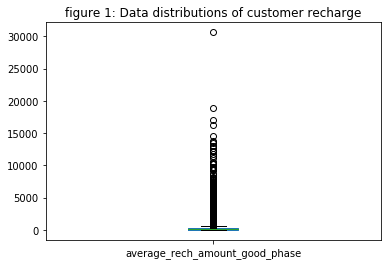

In [31]:
# General box plot of customers
df_telecom['average_rech_amount_good_phase'].plot(kind='box',title='figure 1: Data distributions of customer recharge')
plt.show()

__Remarks:__ There are a couple of inferences that are evident from this box plot.
1. There are more outliers in the upper quantiles (probably > 90th percentile)
2. As we want high value customers, we have to perform outlier treatment.

#### Filtering and Extracting high value customers 

In [32]:
# Let us pick the high value customers out
Q1 = df_telecom['average_rech_amount_good_phase'].quantile(0.7)
df_telecom_highvalue_initial = df_telecom[(df_telecom['average_rech_amount_good_phase'] >= Q1)]

In [33]:
df_telecom_highvalue_initial.shape

(30001, 229)

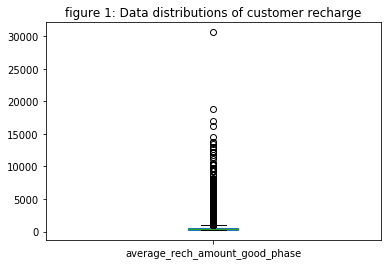

In [34]:
# Replot the box plot to check the data extracion
df_telecom_highvalue_initial['average_rech_amount_good_phase'].plot(kind='box',title='figure 1: Data distributions of customer recharge')
plt.show()

__Remarks:__ The box plots look no diffrent but one can see that we are left with only 30% data. This is due to the outliers being in high value customer space.


#### `Outlier treatment`
It is difficult to make a decision on the quantile at which outliers should be treated. To perform the same, we will do the following steps. Indirectly, this is $3\sigma$ outlier modeling. The steps include
1. Removing outliers at $2\sigma$ (95th percentile) and at $3\sigma$ (99.7th percentile)
2. Checking for the percent loss of data.
3. Making an informed choice of which percent loss of data is a feasible option
4. Choosing that outlier tratement and moving ahead with that data set for final work.

__Note:__ Since, the outliers are in the higher quantiles, we will perform outlier treatment in the right side end, (95th,99.7th) percentiles.

#### `$2\sigma$ Outlier treatment` ($95^{th}$ percentile)

The percentage loss of data with 95th percentile outlier treatment is:


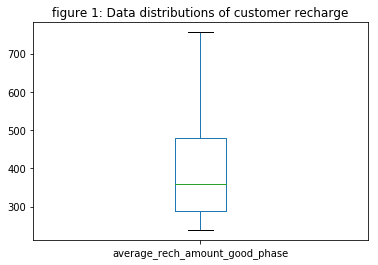

In [35]:
# Let us pick the high value customers out
Q1 = df_telecom['average_rech_amount_good_phase'].quantile(0.95)
df_telecom_highvalue_95 = df_telecom_highvalue_initial[(df_telecom_highvalue_initial['average_rech_amount_good_phase'] <= Q1)]

# Available data after removing outliers
df_telecom_highvalue_95.shape

# Percentage loss of data
print('The percentage loss of data with 95th percentile outlier treatment is:')
100 - 100* df_telecom_highvalue_95.shape[0]/df_telecom_highvalue_initial.shape[0]

# Replot the box plot to check the data extracion
df_telecom_highvalue_95['average_rech_amount_good_phase'].plot(kind='box',title='figure 1: Data distributions of customer recharge')
plt.show()

__Remarks:__ Outliers are really clean but there is 16.7% loss of data

#### `$3\sigma$ Outlier treatment` ($99.7^{th}$ percentile)

In [36]:
# Let us pick the high value customers out
Q1 = df_telecom['average_rech_amount_good_phase'].quantile(0.99)
df_telecom_highvalue_997 = df_telecom_highvalue_initial[(df_telecom_highvalue_initial['average_rech_amount_good_phase'] <= Q1)]

In [37]:
# Available data after removing outliers
df_telecom_highvalue_997.shape

(29001, 229)

In [38]:
# Percentage loss of data
print('The percentage loss of data with 95th percentile outlier treatment is:')
100 - 100* df_telecom_highvalue_997.shape[0]/df_telecom_highvalue_initial.shape[0]

The percentage loss of data with 95th percentile outlier treatment is:


3.333222225925809

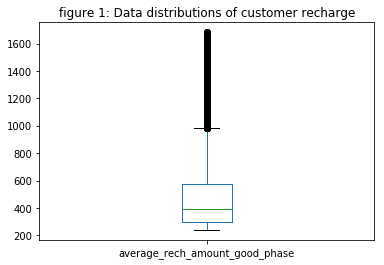

In [39]:
# Replot the box plot to check the data extracion
df_telecom_highvalue_997['average_rech_amount_good_phase'].plot(kind='box',title='figure 1: Data distributions of customer recharge')
plt.show()

__Remarks:__ 
1. In this case, the outliers are evidently clear though some of them persist.
2. As we are working on high value customers, it is not advisable to clear all outliers, since they are also high value customers.
3. The loss of data here is only 3% (Very high value customers)

__Activity:__ We feel this 1% outlier correction is enough to get decent models. So, let us take 99 percentile treated data for further work.

#### Copying the data into final dataframe `df_telecom_highvalue`

In [40]:
df_telecom_highvalue = df_telecom_highvalue_997.copy()

#### <font color = blue> Remarks: This `dataframe` is used from here on </font>

#### Inspecting Datafreme for null values `lap - 6`

In [41]:
column_wise_null_percent_6 = round(100*(df_telecom_highvalue.isnull().sum(axis=0)/len(df_telecom_highvalue.index)),2).sort_values(ascending = False)
# Total number of columns with null values
print('Total number of columns with null values are')
column_wise_null_percent_6[column_wise_null_percent_6 > 0]

Total number of columns with null values are


loc_og_t2o_mou    0.73
std_og_t2o_mou    0.73
loc_ic_t2o_mou    0.73
dtype: float64

#### Deleting the rest of the rows with Nan values

In [42]:
df_telecom_highvalue = df_telecom_highvalue.dropna(how='any',axis=0) 

# Verify the dimensions of the dataframe
print('The percentage loss of data after deleting null values')
100 - 100*df_telecom_highvalue.shape[0]/df_telecom_highvalue_997.shape[0]

The percentage loss of data after deleting null values


0.7344574325023245

__Remarks:__ As expected, we `lost 0.73% data approx`. We assume this will not have any effect on the overall performance since we filter high value customers out.

#### Inspecting Datafreme for null values `lap - 7 (Last)`

In [43]:
column_wise_null_percent_7 = round(100*(df_telecom_highvalue.isnull().sum(axis=0)/len(df_telecom_highvalue.index)),2).sort_values(ascending = False)
column_wise_null_percent_7[0:4]

average_rech_amount_good_phase    0.0
loc_ic_t2t_mou_6                  0.0
total_og_mou_8                    0.0
total_og_mou_7                    0.0
dtype: float64

#### __Remarks:__ __`Data is completely cleaned and imputed with no null values at all`__

### 3.8 `Adding Churn Indicators`
1. `Churn Indicator 0 or 1 is tagged using the following condition that the following columns are `0``
    1. total_ic_mou_9 == 0
    2. total_og_mou_9 == 0
    3. vol_2g_mb_9 == 0
    4. vol_3g_mb_9 == 0

In [44]:
df_telecom_highvalue[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head(2)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
mobile_number,,,,
7000842753,0.0,0.0,0.0,0.0
7000701601,0.0,0.0,0.0,0.0


In [45]:
# Create Churn column and classify churned customers
df_telecom_highvalue['churn'] = 0
df_telecom_highvalue['churn'].head()

mobile_number
7000842753    0
7000701601    0
7001524846    0
7002124215    0
7000887461    0
Name: churn, dtype: int64

In [46]:
is_churned = (df_telecom_highvalue.total_ic_mou_9 == 0) & (df_telecom_highvalue.total_og_mou_9 == 0) & (df_telecom_highvalue.vol_2g_mb_9 == 0) & (df_telecom_highvalue.vol_3g_mb_9 == 0)
df_telecom_highvalue.loc[is_churned,'churn'] = 1

#### Have a look at the ratio of churn to non churn

In [47]:
# Check churn rate
print('The churn percent is:')
round(100*df_telecom_highvalue.churn.sum()/len(is_churned),2)

The churn percent is:


7.98

#### Bar Plot representing the `churn to non churn`

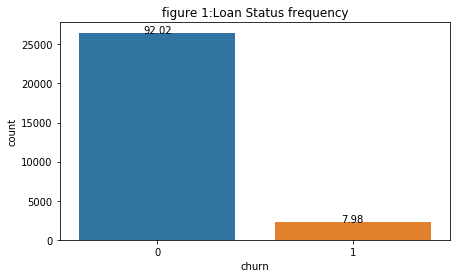

In [48]:
plt.figure(figsize=(7, 4))                               # Figure Size

ax = sns.countplot(x="churn", data=df_telecom_highvalue) # Plot definition
plt.title("figure 1:Loan Status frequency")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 

__Remarks:__ We can see that there is an imbalance in churn to non churn ratio.
7.98% of customers churned from the above analysis

### 3.9 `Dropping` $9^{th}$ `month Columns`
Since, Churn indicator is placed, we are dropping all 9th month columns as we have to predict them

In [49]:
# Delete all columns related to 9th month
columns_month_9 = df_telecom_highvalue.columns[df_telecom_highvalue.columns.str.contains('_9')]
print(columns_month_9)

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [50]:
# Delete all columns related to 9th Month
df_telecom_highvalue.drop(columns_month_9, axis=1, inplace = True)

In [51]:
# Check the shape
df_telecom_highvalue.shape

(28788, 176)

In [52]:
df_telecom_highvalue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28788 entries, 7000842753 to 7000498689
Columns: 176 entries, circle_id to churn
dtypes: datetime64[ns](3), float64(140), int64(27), object(6)
memory usage: 40.1+ MB


### 4. `Exploratory Data Analysis (EDA) & Feature Engineering`
It is evident from the data that the data provided is `raw data`. We need to do alot of feature engineering to capture trends in data. For this reason, we will work on EDA and feature engineering hand in hand with each other. We repeat the following activity cycle at every step for EDA and Feature Engineering.
1. Select a column / Activity (Across 6,7,8 months)
2. Compute `Mean` as metric
3. Study whether mean explains churn
4. If the mean changes with churn and non churn tags, derive a feature
    1. Trend in Good Phase (Mean of Variable for June and July)
    2. Trend in action Phase (Column itself, no need yo derive any feature)
5. Immediately delete the raw data (columns) to avoid multi-collinearity

#### Across columns, In order to maintain uniformity, We derived `mean(good phase) and mean(action phase)` as features.

#### Column 1: `Age on Network`

In [53]:
# Check mean values of age on netwrok for both churned and non-churned customers
print("Mean of churned customers for aon: ", df_telecom_highvalue.loc[df_telecom_highvalue.churn == 1, 'aon'].mean())
print("Mean of non-churned customers for aon: ",df_telecom_highvalue.loc[df_telecom_highvalue.churn == 0, 'aon'].mean())


Mean of churned customers for aon:  871.8619939050936
Mean of non-churned customers for aon:  1252.0717979691217


__Remarks:__ We can see that the average `age on network is low for churned customers compared to non-churned`. Lets confirm this fact with barplot

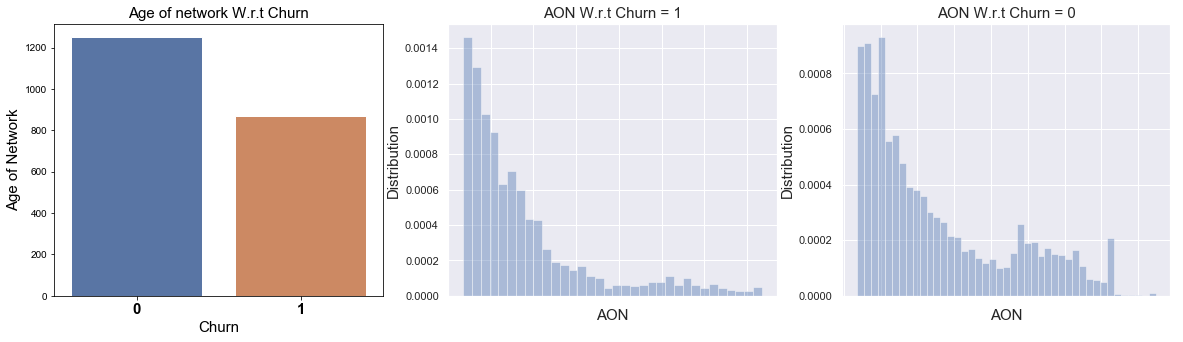

In [54]:
plt.figure(figsize=(20,5))  # Figure Size
# Column = AON
plt.subplot(1,3,1)
sns.set(style="darkgrid")
ax=sns.barplot(x = 'churn',y ='aon',data = df_telecom_highvalue, ci = None)
plt.title('Age of network W.r.t Churn', fontsize=15)
plt.ylabel('Age of Network', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

# Plot the age on network distribution for both churned and non-churned customers
plt.subplot(1,3,2)
sns.set(style="darkgrid")
ax=sns.distplot(df_telecom_highvalue.loc[df_telecom_highvalue.churn == 1, 'aon'], kde = False,
               norm_hist = True)
plt.title('AON W.r.t Churn = 1', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.xlabel('AON', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

plt.subplot(1,3,3)
sns.set(style="darkgrid")
ax=sns.distplot(df_telecom_highvalue.loc[df_telecom_highvalue.churn == 0, 'aon'], kde = False,
               norm_hist = True)
plt.title('AON W.r.t Churn = 0', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.xlabel('AON', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)


plt.show()


__Remark:__ 
1. We can clearly notice that majority of churned customers are of less than 1500 days of age on netwrok. 
2. `Age of Network` independently is a good indicator, so no features are derived for this.

__Note:__ The Y-Axis is scalled. We should see that `0.001 in figure = 100`

#### Column 2:  `Average Revenue Per User` 

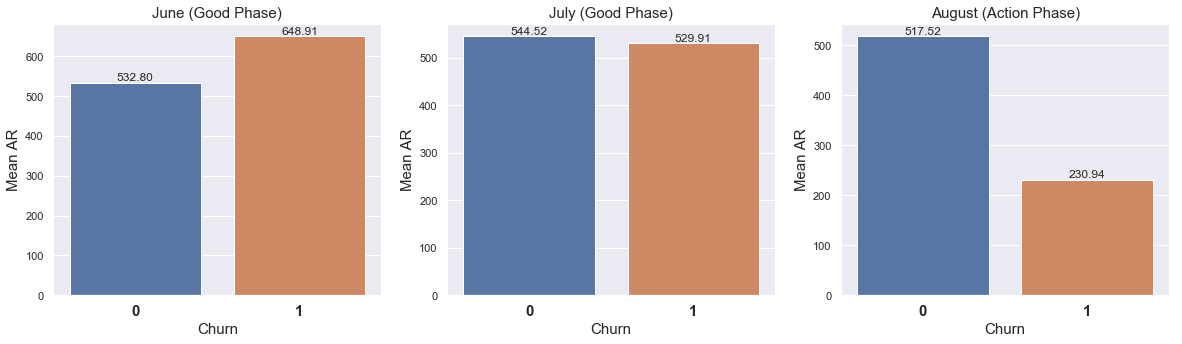

In [55]:
# Column = Average Revenue Per User
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "arpu_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Mean AR', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "arpu_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Mean AR', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "arpu_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Mean AR', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = round(p.get_height(),2)
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [56]:
percent_drop = round(100*(230.94-(648.91+529.91)/2)/230.94)
print("Percentage drop in arpu between good and action phase is: ",percent_drop)

Percentage drop in arpu between good and action phase is:  -155


__Observation:__ Churned customers have witnessed the highest drop in mean arpu compared to non-churned customers. Hence we are deriving features for the same. Remember! Metric is based on mean for good phase

In [57]:
# Create a new variable for arpu in good phase
df_telecom_highvalue["arpu_goodphase"] = (df_telecom_highvalue.arpu_6 + df_telecom_highvalue.arpu_7)/2

In [58]:
# Delete arpu_6 and arpu_7                     
df_telecom_highvalue.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

#### Column 3:` Recharge amount calls`

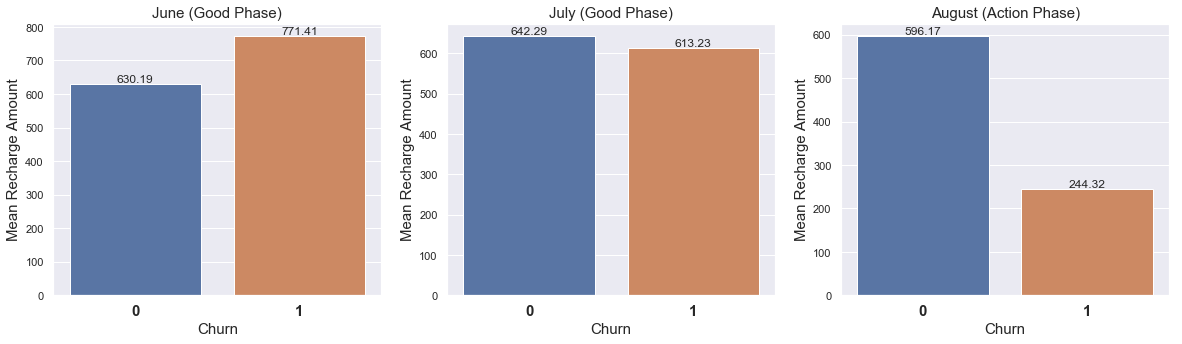

In [59]:
# Column = Total Recharge Amount
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "total_rech_amt_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Mean Recharge Amount', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "total_rech_amt_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Mean Recharge Amount', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "total_rech_amt_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Mean Recharge Amount', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [60]:
percent_drop = round(100*(244.32-(771.41+613.23)/2)/244.32)
print("Percentage drop in total recharge amount between good and action phase is: ",percent_drop)

Percentage drop in total recharge amount between good and action phase is:  -183


__Observation:__ Churned customers have witnessed the highest drop in mean total_rech_amt compared to non-churned customers

In [61]:
# Create Features for total recharge amount for calls
df_telecom_highvalue["Total_rech_amt_calls_goodphase"] = (df_telecom_highvalue.total_rech_amt_6 + df_telecom_highvalue.total_rech_amt_7)/2

In [62]:
# Drop original columns of total rech amount
df_telecom_highvalue.drop(['total_rech_amt_6','total_rech_amt_7'], inplace=True, axis=1)

#### Column 4: `Average Recharge Amount for Data`

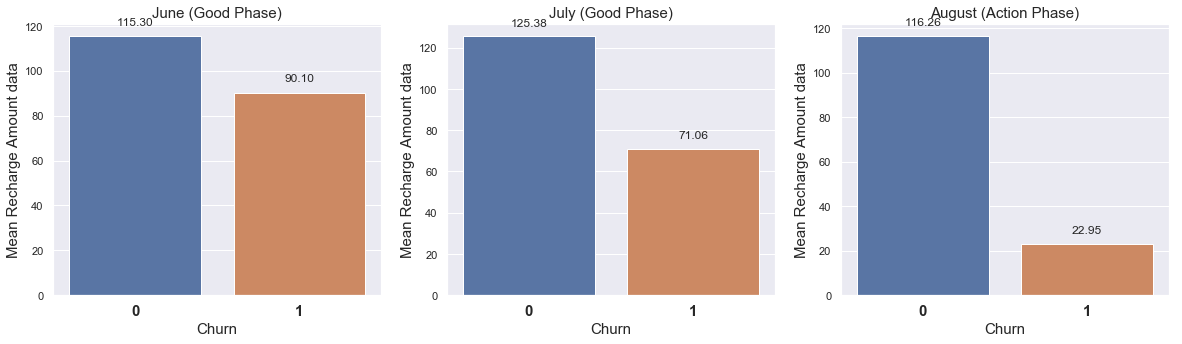

In [63]:
# Column = Average Recharge Amount for data
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "av_rech_amt_data_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Mean Recharge Amount data', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "av_rech_amt_data_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Mean Recharge Amount data', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "av_rech_amt_data_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Mean Recharge Amount data', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [64]:
percent_drop = round(100*(22.95-(90.1+71.06)/2)/22.95)
print("Percentage drop in total recharge amount between good and action phase is: ",percent_drop)

Percentage drop in total recharge amount between good and action phase is:  -251


__Observation:__ Churned customers have witnessed the highest drop in mean average_rech_amt compared to non-churned customers.

In [65]:
# Calculate total recharge amount for data
df_telecom_highvalue["total_rech_amt_data_6"] = df_telecom_highvalue.total_rech_data_6*df_telecom_highvalue.av_rech_amt_data_6
df_telecom_highvalue["total_rech_amt_data_7"] = df_telecom_highvalue.total_rech_data_7*df_telecom_highvalue.av_rech_amt_data_7
df_telecom_highvalue["total_rech_amt_data_8"] = df_telecom_highvalue.total_rech_data_8*df_telecom_highvalue.av_rech_amt_data_8

In [66]:
# Create Features for good phase total recharge amount data
df_telecom_highvalue["Total_rech_amt_data_goodphase"] = (df_telecom_highvalue.total_rech_amt_data_6 + df_telecom_highvalue.total_rech_amt_data_7)/2
# Create feature for good phase total recharge amount for calls + data
df_telecom_highvalue["Total_rech_amt_goodphase"] = df_telecom_highvalue.Total_rech_amt_calls_goodphase + df_telecom_highvalue.Total_rech_amt_data_goodphase

In [67]:
# Drop data related original variables as we have used them to derive total_rech_amt_data
df_telecom_highvalue.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
                           'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'], axis=1, inplace=True)

#### Column  5:  `Maximum recharge amount`

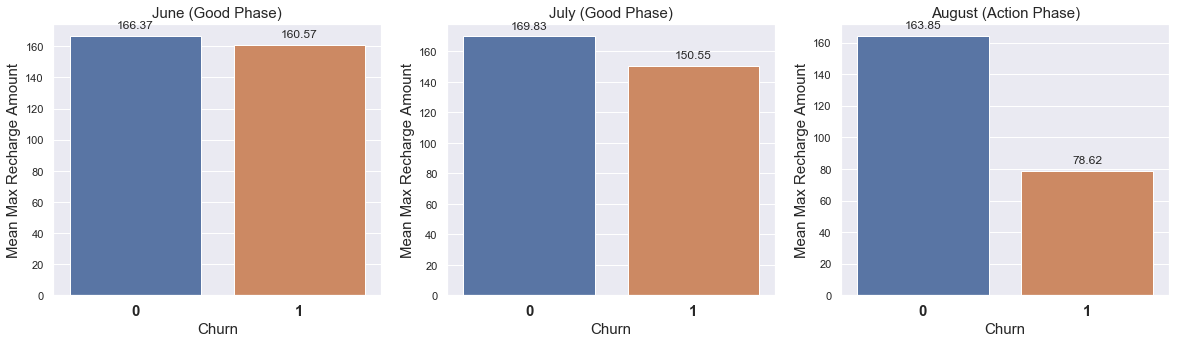

In [68]:
# Analyse maximum recharge amount

# Column = Maximum Recharge Amount
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "max_rech_amt_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Mean Max Recharge Amount', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "max_rech_amt_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Mean Max Recharge Amount', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "max_rech_amt_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Mean Max Recharge Amount', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [69]:
percent_drop = round(100*(78.62-(160.57+150.55)/2)/78.62)
print("Percentage drop in max recharge amount between good and action phase is: ",percent_drop)

Percentage drop in max recharge amount between good and action phase is:  -98


__Observation:__ Churned customers have witnessed the highest drop in mean max_rech_amt compared to non-churned customers

In [70]:
# Create new variable for max_rech_amt for good phase
df_telecom_highvalue["max_rech_amt_calls_goodphase"] = (df_telecom_highvalue.max_rech_amt_6 + df_telecom_highvalue.max_rech_amt_7)/2

In [71]:
# Drop original columns of max rech
df_telecom_highvalue.drop(['max_rech_amt_6','max_rech_amt_7'], inplace=True, axis=1)

#### Column 6: `Last day recharge amount`

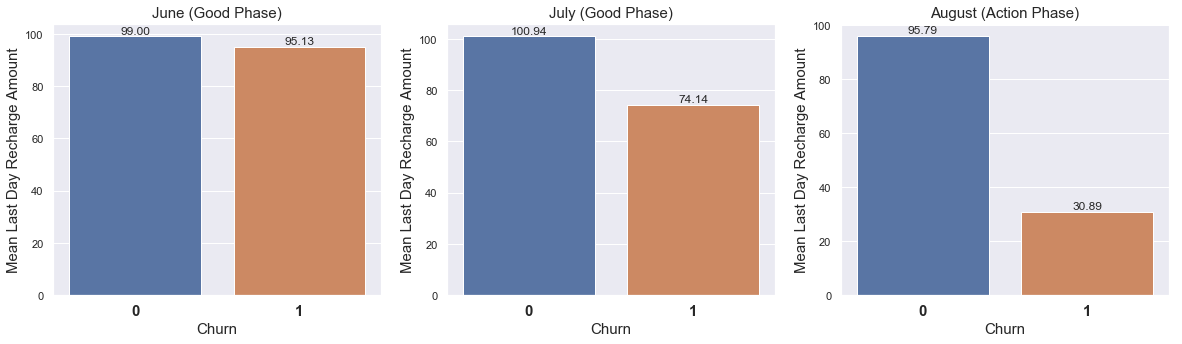

In [72]:
# Column is last_day_rch_amt

plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "last_day_rch_amt_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Mean Last Day Recharge Amount', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 1,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "last_day_rch_amt_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Mean Last Day Recharge Amount', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 1,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "last_day_rch_amt_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Mean Last Day Recharge Amount', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 1,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [73]:
percent_drop = round(100*(30.89-(95.13+74.14)/2)/30.89)
print("Percentage drop in last day recharge amount between good and action phase is: ",percent_drop)

Percentage drop in last day recharge amount between good and action phase is:  -174


__Observation:__ Churned customers have witnessed the highest drop in mean last_day_rch_amt compared to non-churned customers. Last day recharge amount in a month is as good as last recharge of the month. So far, we are not planning to derive any feature from this. We will look at it at a later time.

#### Column 7: `Number of recharges`

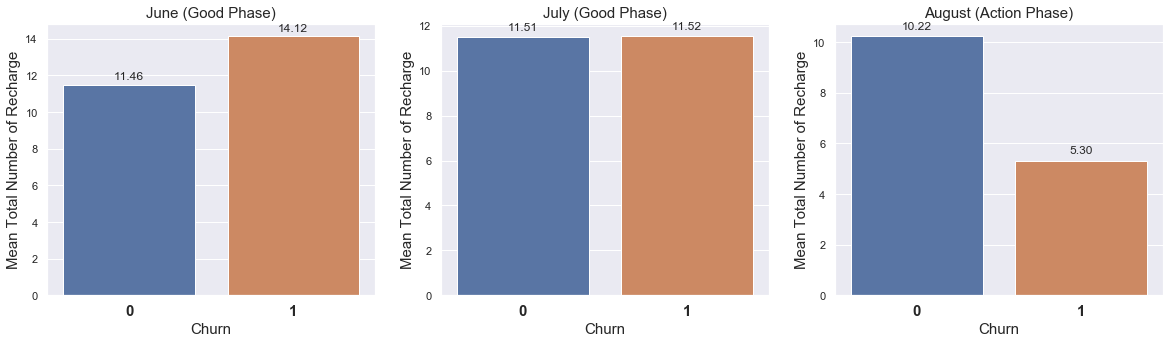

In [74]:
# Column - Total Number of Recharges

plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "total_rech_num_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Mean Total Number of Recharge', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "total_rech_num_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Mean Total Number of Recharge', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "total_rech_num_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Mean Total Number of Recharge', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [75]:
percent_drop = round(100*(5.3-(14.12+11.52)/2)/5.3)
print("Percentage drop in number of recharges between good and action phase is: ",percent_drop)

Percentage drop in number of recharges between good and action phase is:  -142


__Observation:__ Churned customers have witnessed the highest drop in total_rech_num compared to non-churned customers. Since we already derived feature from total recharge amount which will be related to number of recharges. We are not deriving any features from this.

#### Column 8: `Maximum data recharges`

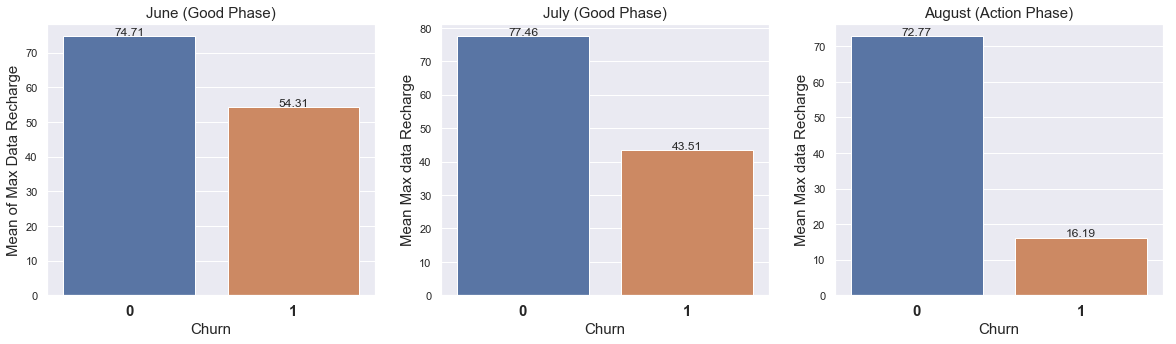

In [76]:
# Column maximum data recharges

plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "max_rech_data_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Mean of Max Data Recharge', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "max_rech_data_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Mean Max data Recharge', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "max_rech_data_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Mean Max data Recharge', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()


In [77]:
percent_drop = round(100*(16.19-(54.31+43.51)/2)/16.19)
print("Percentage drop in maximum data rechares between good and action phase is: ",percent_drop)

Percentage drop in maximum data rechares between good and action phase is:  -202


__Observation:__ Churned customers have witnessed the highest drop in mean max_rech_data compared to non-churned customers. Max data recharge is included in total data recharge. So, we did not derive any new feature in this. Since, All recharge amount related data is studied. Let us drop the columns

#### Column 9-10:  `2G & 3G volumes`

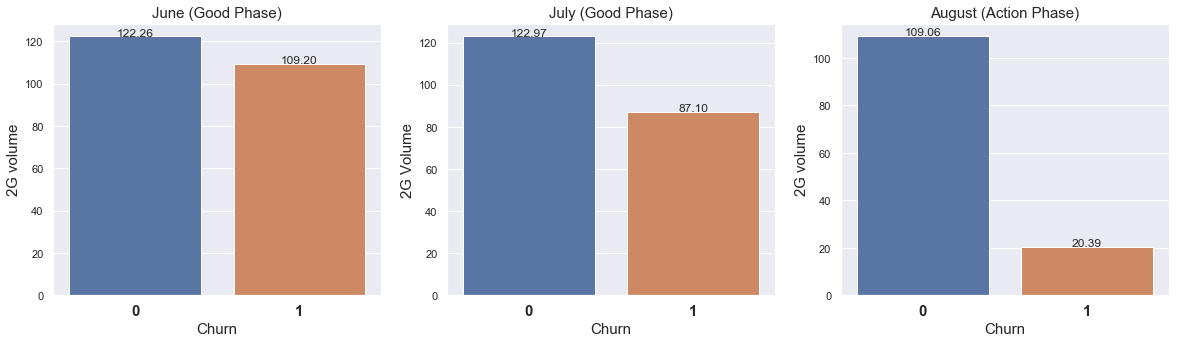

In [78]:
# Analyse 2G volume

plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "vol_2g_mb_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('2G volume', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "vol_2g_mb_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('2G Volume', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "vol_2g_mb_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('2G volume', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()



In [79]:
percent_drop = round(100*(20.39-(109.2+87.1)/2)/20.39)
print("Percentage drop in 2G volumes between good and action phase is: ",percent_drop)

Percentage drop in 2G volumes between good and action phase is:  -381


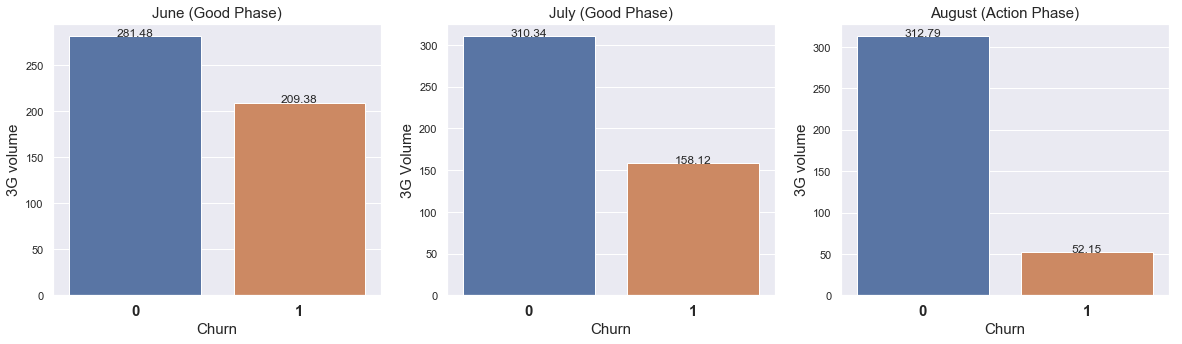

In [80]:
# Analyse 3G volume
# Chruned Customers
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "vol_3g_mb_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('3G volume', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "vol_3g_mb_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('3G Volume', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "vol_3g_mb_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('3G volume', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.3,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()




In [81]:
percent_drop = round(100*(52.15-(209.38+158.12)/2)/52.15)
print("Percentage drop in 3G volumes between good and action phase is: ",percent_drop)

Percentage drop in 3G volumes between good and action phase is:  -252


__Observation:__ Churned customers have witnessed the highest drop in mean 2G and 3G volumes compared to non-churned customers

In [82]:
# Create new variables for 2G and 3G volumes
df_telecom_highvalue["vol_2g_mb_goodphase"] = (df_telecom_highvalue.vol_2g_mb_6 + df_telecom_highvalue.vol_2g_mb_7)/2
df_telecom_highvalue["vol_3g_mb_goodphase"] = (df_telecom_highvalue.vol_3g_mb_6 + df_telecom_highvalue.vol_3g_mb_7)/2

In [83]:
# Drop the original variables as we have derived new variables
df_telecom_highvalue.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7'], axis=1, inplace=True)

#### Column 11: `Night pack`

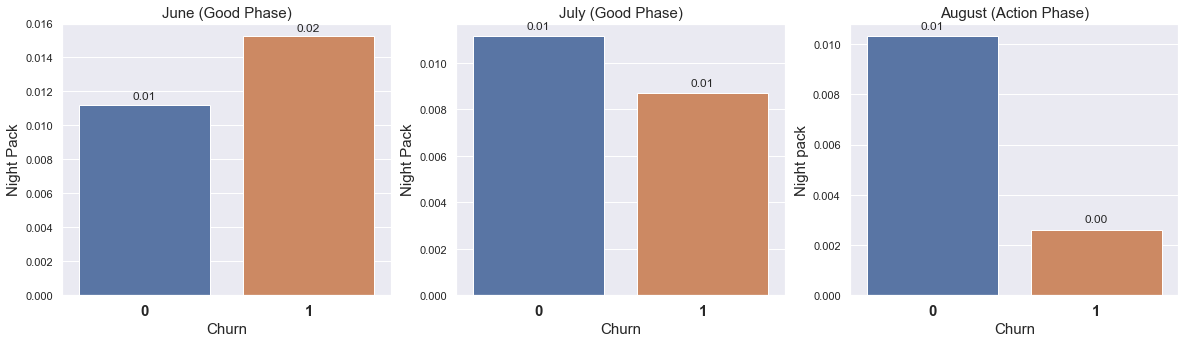

In [84]:
# Analyse night pack
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "night_pck_user_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Night Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "night_pck_user_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Night Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "night_pck_user_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Night pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()




__Observation:__ Churned customers have witnessed the highest drop in mean night_pack_user compared to non-churned customers.

#### Column 12: `Monthly 2G & 3G`

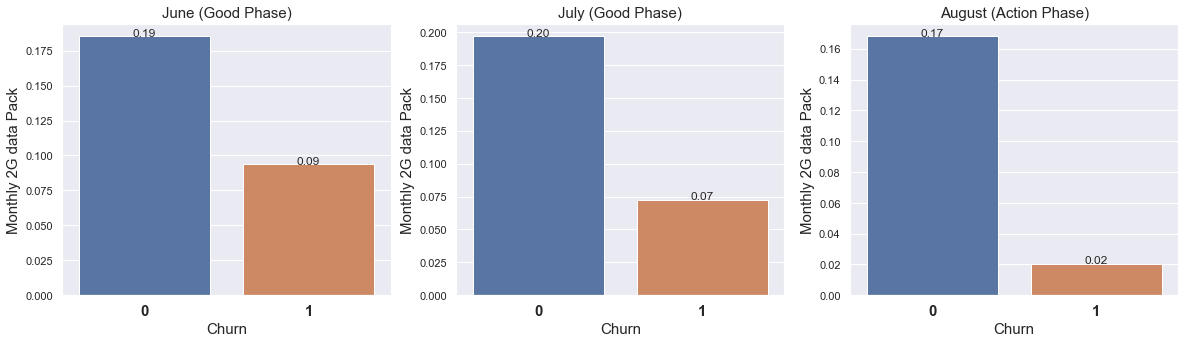

In [85]:
# Analyse monthly 2G
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "monthly_2g_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Monthly 2G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "monthly_2g_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Monthly 2G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "monthly_2g_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Monthly 2G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()



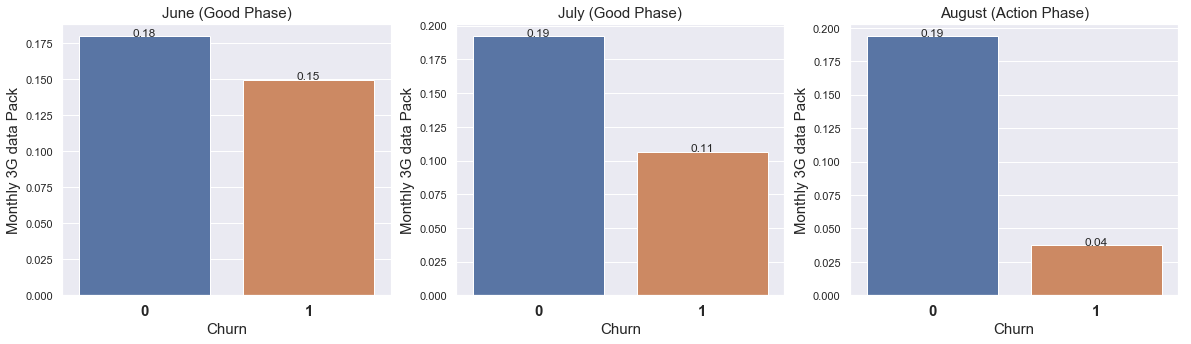

In [86]:
# Analyse monthly 3G

plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "monthly_3g_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Monthly 3G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "monthly_3g_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Monthly 3G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "monthly_3g_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Monthly 3G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [87]:
# Create new variables for monthly 2G and 3G
df_telecom_highvalue["monthly_2g_6_goodphase"] = (df_telecom_highvalue.monthly_2g_6 + df_telecom_highvalue.monthly_2g_7)/2
df_telecom_highvalue["monthly_3g_6_goodphase"] = (df_telecom_highvalue.monthly_3g_6 + df_telecom_highvalue.monthly_3g_7)/2

In [88]:
# Drop the original variables as we have derived new variables
df_telecom_highvalue.drop(['monthly_2g_6','monthly_2g_7','monthly_3g_6','monthly_3g_7'], axis=1, inplace=True)

__Observations:__ As usual, the data packs are effecting the churn. So, we are creating features for good phase and action phase and deleting the original variables in the above cells.

#### Column 13: `Sachet 2G & 3G`

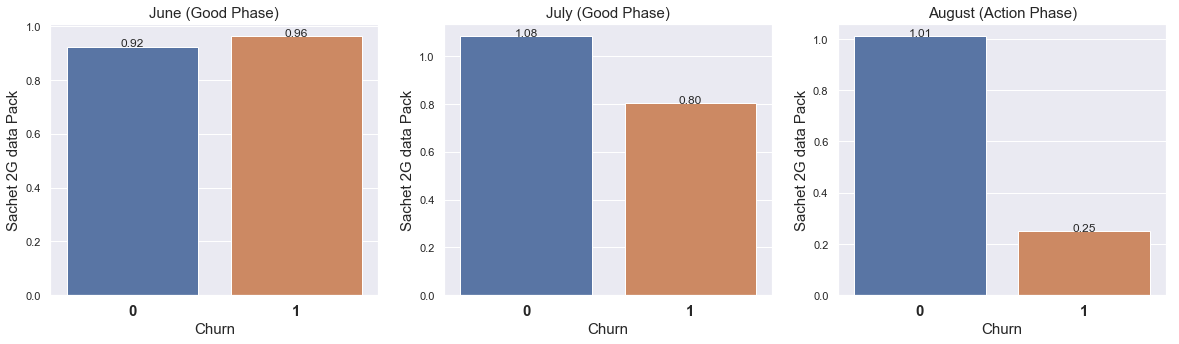

In [89]:
## Analyse Sachet 2G
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "sachet_2g_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Sachet 2G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "sachet_2g_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Sachet 2G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "sachet_2g_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Sachet 2G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

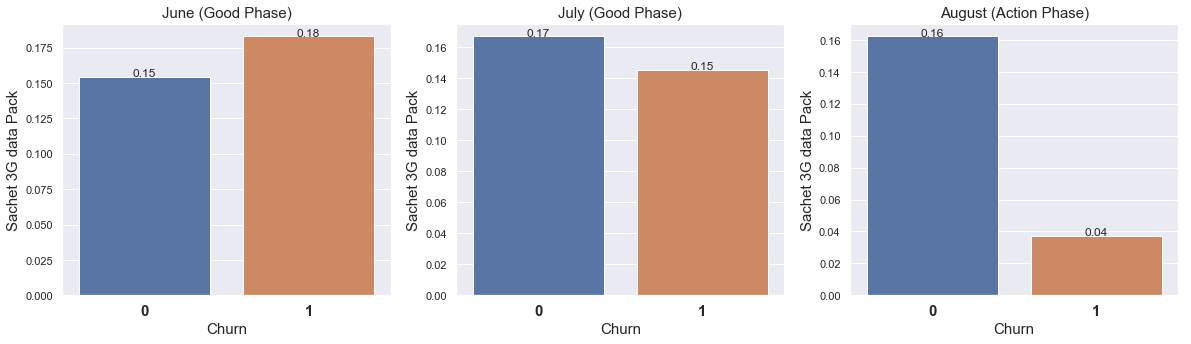

In [90]:
# Analyse Sachet 3G
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "sachet_3g_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Sachet 3G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "sachet_3g_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Sachet 3G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "sachet_3g_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Sachet 3G data Pack', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

__Observation:__ Churned customers have witnessed the highest drop in mean monthly 2G & 3G as well as Sachet 2G & 3G compared to non-churned customers

In [91]:
# Create new variables for Sachet 2G and 3G
df_telecom_highvalue["sachet_2g_goodphase"] = (df_telecom_highvalue.sachet_2g_6 + df_telecom_highvalue.sachet_2g_7)/2
df_telecom_highvalue["sachet_3g_goodphase"] = (df_telecom_highvalue.sachet_3g_6 + df_telecom_highvalue.sachet_3g_7)/2

In [92]:
# Drop the original variables as we have derived new variables
df_telecom_highvalue.drop(['sachet_2g_6','sachet_2g_7','sachet_3g_6','sachet_3g_7'], axis=1, inplace=True)

#### Column 14: `Volume based cost`

In [93]:
# Process voice based cost column names in line with other columns in the data frame
df_telecom_highvalue.rename(columns= {'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8'}, inplace=True)
df_telecom_highvalue.drop('sep_vbc_3g', axis = 1, inplace=True)

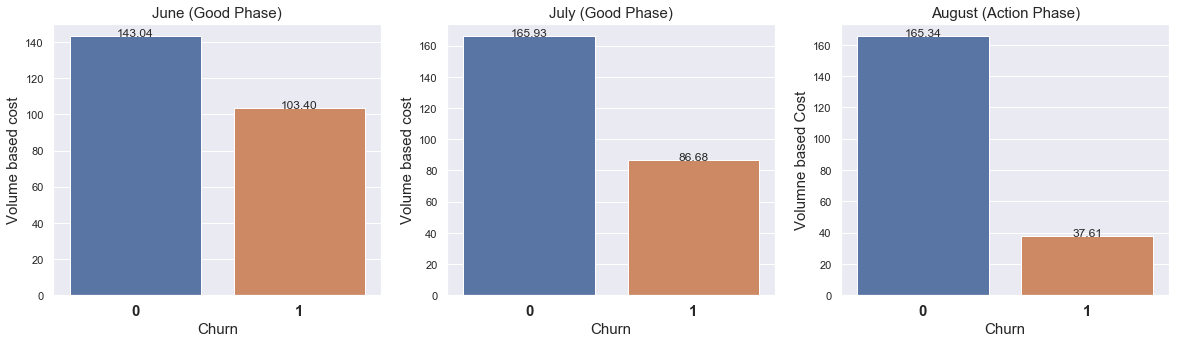

In [94]:
# Analyse volume based cost 

plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "vbc_3g_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Volume based cost', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "vbc_3g_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Volume based cost', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "vbc_3g_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Volumne based Cost', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [95]:
percent_drop = round(100*(37.61-(103.4+86.68)/2)/37.61)
print("Percentage drop in volume based cost between good and action phase is: ",percent_drop)

Percentage drop in volume based cost between good and action phase is:  -153


__Observation:__ Churned customers have witnessed the highest drop in mean volume based cost compared to non-churned customers

In [96]:
# Create new variables for volume base cost
df_telecom_highvalue["vbc_3g_goodphase"] = (df_telecom_highvalue.vbc_3g_6 + df_telecom_highvalue.vbc_3g_7)/2

In [97]:
# Drop the original variables as we have derived new variables
df_telecom_highvalue.drop(['vbc_3g_6','vbc_3g_7'], axis=1, inplace=True)

#### Column 15: `Onnetwork and Offnetwork Usage`

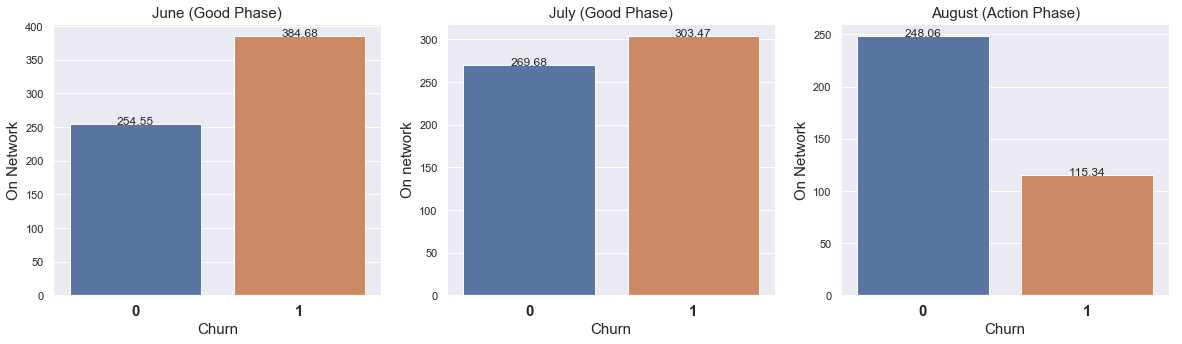

In [98]:
# Analyse Onnetwork Usage
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "onnet_mou_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('On Network', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "onnet_mou_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('On network', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "onnet_mou_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('On Network', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [99]:
percent_drop = round(100*(115.34-(384.68+303.47)/2)/115.34)
print("Percentage drop in onnetwork mou between good and action phase is: ",percent_drop)

Percentage drop in onnetwork mou between good and action phase is:  -198


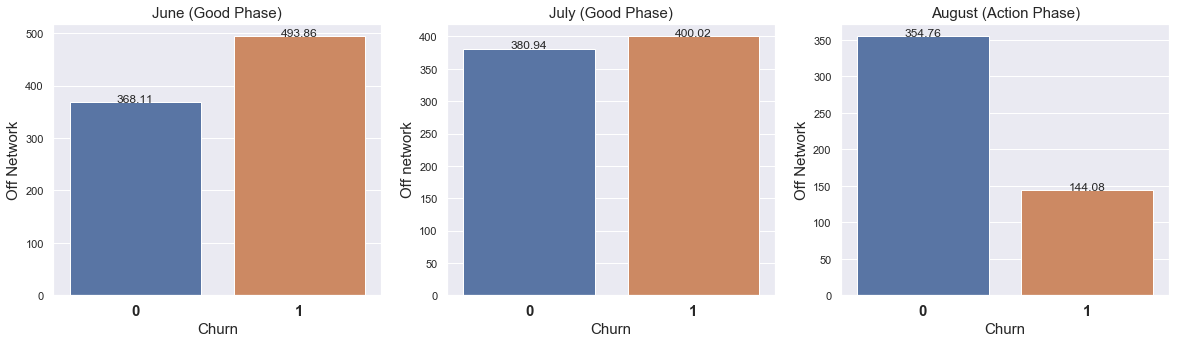

In [100]:
# Analyse Offnetwork Usage
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "offnet_mou_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Off Network', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "offnet_mou_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Off network', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "offnet_mou_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Off Network', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [101]:
percent_drop = round(100*(144.08-(493.86+400.02)/2)/144.08)
print("Percentage drop in offnetwork mou between good and action phase is: ",percent_drop)

Percentage drop in offnetwork mou between good and action phase is:  -210


__Observation:__ Churned customers have witnessed the highest drop in mean onnetwork and offnetwork minutes of usage compared to non-churned customers

#### Column 16: `Roaming incoming and Outgoing usage`

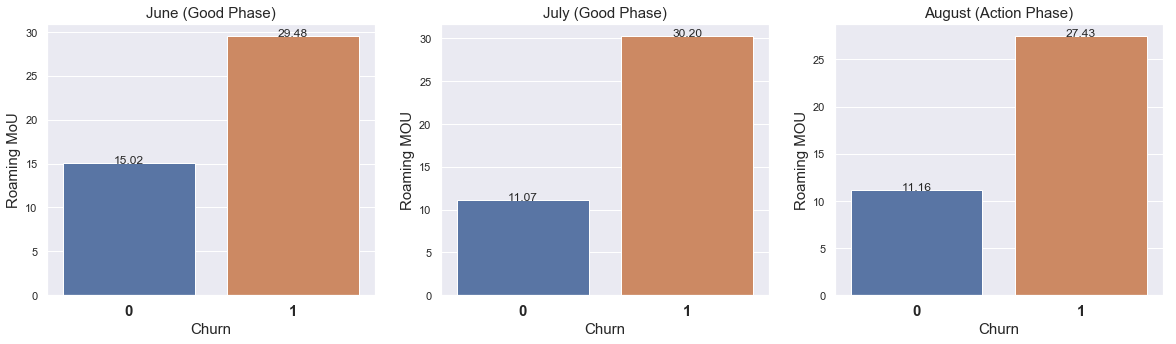

In [102]:
# Analyse Roaming incoming usage
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "roam_ic_mou_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Roaming MoU', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "roam_ic_mou_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Roaming MOU', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "roam_ic_mou_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Roaming MOU', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

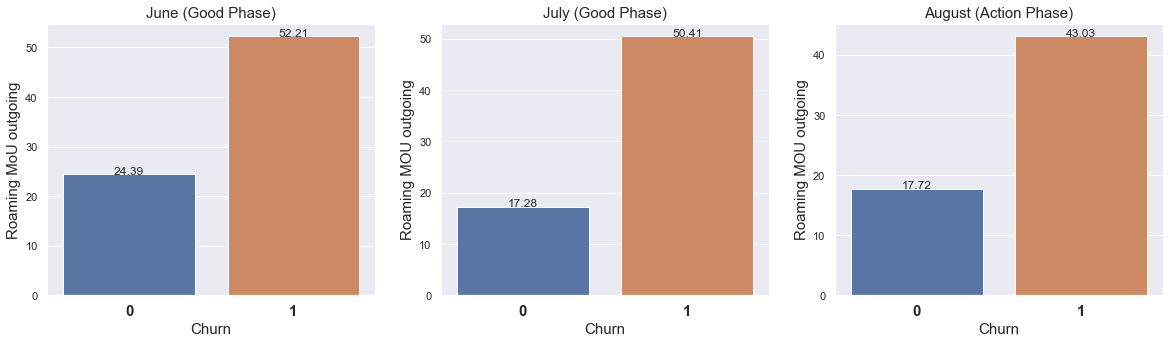

In [103]:
# Analyse Roaming outgoing usage
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "roam_og_mou_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Roaming MoU outgoing', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "roam_og_mou_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Roaming MOU outgoing', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "roam_og_mou_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Roaming MOU outgoing', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

__Observation:__ Based on roaming data, there is no much difference between Churned and Non-churned customers

#### Column 17: `Minutes of Usage`
__`Analysis of incoming and outgoing usage:`__ Based on our business understanding, we can assume that Total Incoming minutes are sum of individual components such as 
1. Incoming mou
    1. __loc_ic_mou =__ loc_ic_t2t_mou, loc_ic_t2m_mou, loc_ic_t2f_mou 
    2. __std_ic_mou =__ std_ic_t2t_mou + std_ic_t2m_mou + std_ic_t2f_mou + std_ic_t2o_mou
    3. __total_ic_mou =__ loc_ic_mou + std_ic_mou + isd_ic_mou + spl_ic_mou + ic_others + roam_ic_mou
2. Outgoing mou
    4. __loc_og_mou =__ loc_og_t2t_mou, loc_og_t2m_mou, loc_og_t2f_mou
    5. __std_og_mou =__ std_og_t2t_mou + std_og_t2m_mou + std_og_t2f_mou + std_og_t2o_mou
    6. __total_og_mou =__ loc_og_mou + std_og_mou + isd_og_mou + spl_og_mou + og_others + roam_og_mou

##### We will verify this below

In [104]:
# Analyse incoming usage for 6th month
print("Incoming mou")
print(df_telecom_highvalue.loc_ic_mou_6.sum())
print(df_telecom_highvalue.loc_ic_t2t_mou_6.sum()+ df_telecom_highvalue.loc_ic_t2m_mou_6.sum()+df_telecom_highvalue.loc_ic_t2f_mou_6.sum())
# Analyse outgoing usage for 6th month
print("Outgoing mou")
print(df_telecom_highvalue.loc_og_mou_6.sum())
print(df_telecom_highvalue.loc_og_t2t_mou_6.sum()+ df_telecom_highvalue.loc_og_t2m_mou_6.sum()+df_telecom_highvalue.loc_og_t2f_mou_6.sum())


Incoming mou
6723922.85
6723643.3
Outgoing mou
7396593.810000001
7396354.720000001


In [105]:
# Analyse incoming usage for 6th month
print("Incoming mou")
print(df_telecom_highvalue.std_ic_mou_6.sum())
print(df_telecom_highvalue.std_ic_t2t_mou_6.sum()+ df_telecom_highvalue.std_ic_t2m_mou_6.sum()+df_telecom_highvalue.std_ic_t2f_mou_6.sum())
# Analyse outgoing usage for 6th month
print("Outgoing mou")
print(df_telecom_highvalue.std_og_mou_6.sum())
print(df_telecom_highvalue.std_og_t2t_mou_6.sum()+ df_telecom_highvalue.std_og_t2m_mou_6.sum()+df_telecom_highvalue.std_og_t2f_mou_6.sum())

Incoming mou
1359899.5699999998
1359795.01
Outgoing mou
10177004.879999999
10176895.91


In [106]:
# Analyse incoming usage for 6th month
print("Incoming mou")
print(df_telecom_highvalue.total_ic_mou_6.sum())
print(df_telecom_highvalue.loc_ic_mou_6.sum()+ df_telecom_highvalue.std_ic_mou_6.sum()+df_telecom_highvalue.isd_ic_mou_6.sum()+
     +df_telecom_highvalue.spl_ic_mou_6.sum()
     +df_telecom_highvalue.ic_others_6.sum())
# Analyse outgoing usage for 6th month
print("Outgoing mou")
print(df_telecom_highvalue.total_og_mou_6.sum())
print(df_telecom_highvalue.loc_og_mou_6.sum()+ df_telecom_highvalue.std_og_mou_6.sum()+df_telecom_highvalue.isd_og_mou_6.sum()+
     +df_telecom_highvalue.spl_og_mou_6.sum()
     +df_telecom_highvalue.og_others_6.sum())


Incoming mou
8420016.98
8419781.59
Outgoing mou
17799902.49
17799640.840000004


__Observation:__ Based on above analysis, we can see that provided total values in the data are sum of individual components. Hence, it is safe to derive new variables from these and then delete original columns 

In [107]:
# Create new variables for incoming and outgoing minutes of usage for good phase
# Local incoming variables
df_telecom_highvalue["loc_ic_t2f_mou_goodphase"] = (df_telecom_highvalue.loc_ic_t2f_mou_6 + df_telecom_highvalue.loc_ic_t2f_mou_7)/2
df_telecom_highvalue["loc_ic_t2m_mou_goodphase"] = (df_telecom_highvalue.loc_ic_t2m_mou_6 + df_telecom_highvalue.loc_ic_t2m_mou_7)/2
df_telecom_highvalue["loc_ic_t2t_mou_goodphase"] = (df_telecom_highvalue.loc_ic_t2t_mou_6 + df_telecom_highvalue.loc_ic_t2t_mou_7)/2
# STD and other incoming variables
df_telecom_highvalue["std_ic_t2f_mou_goodphase"] = (df_telecom_highvalue.std_ic_t2f_mou_6 + df_telecom_highvalue.std_ic_t2f_mou_7)/2
df_telecom_highvalue["std_ic_t2m_mou_goodphase"] = (df_telecom_highvalue.std_ic_t2m_mou_6 + df_telecom_highvalue.std_ic_t2m_mou_7)/2
df_telecom_highvalue["std_ic_t2o_mou_goodphase"] = (df_telecom_highvalue.std_ic_t2o_mou_6 + df_telecom_highvalue.std_ic_t2o_mou_7)/2
df_telecom_highvalue["std_ic_t2t_mou_goodphase"] = (df_telecom_highvalue.std_ic_t2t_mou_6 + df_telecom_highvalue.std_ic_t2t_mou_7)/2
df_telecom_highvalue["isd_ic_mou_goodphase"] = (df_telecom_highvalue.isd_ic_mou_6 + df_telecom_highvalue.isd_ic_mou_7)/2
df_telecom_highvalue["spl_ic_mou_goodphase"] = (df_telecom_highvalue.spl_ic_mou_6 + df_telecom_highvalue.spl_ic_mou_7)/2
df_telecom_highvalue["ic_others_goodphase"] = (df_telecom_highvalue.ic_others_6 + df_telecom_highvalue.ic_others_7)/2
df_telecom_highvalue["roam_ic_mou_goodphase"] = (df_telecom_highvalue.roam_ic_mou_6 + df_telecom_highvalue.roam_ic_mou_7)/2

# Local outgoing variables
df_telecom_highvalue["loc_og_t2f_mou_goodphase"] = (df_telecom_highvalue.loc_og_t2f_mou_6 + df_telecom_highvalue.loc_og_t2f_mou_7)/2
df_telecom_highvalue["loc_og_t2m_mou_goodphase"] = (df_telecom_highvalue.loc_og_t2m_mou_6 + df_telecom_highvalue.loc_og_t2m_mou_7)/2
df_telecom_highvalue["loc_og_t2t_mou_goodphase"] = (df_telecom_highvalue.loc_og_t2t_mou_6 + df_telecom_highvalue.loc_og_t2t_mou_7)/2
# STD and other outgoing variables
df_telecom_highvalue["std_og_t2f_mou_goodphase"] = (df_telecom_highvalue.std_og_t2f_mou_6 + df_telecom_highvalue.std_og_t2f_mou_7)/2
df_telecom_highvalue["std_og_t2m_mou_goodphase"] = (df_telecom_highvalue.std_og_t2m_mou_6 + df_telecom_highvalue.std_og_t2m_mou_7)/2
df_telecom_highvalue["std_og_t2t_mou_goodphase"] = (df_telecom_highvalue.std_og_t2t_mou_6 + df_telecom_highvalue.std_og_t2t_mou_7)/2
df_telecom_highvalue["isd_og_mou_goodphase"] = (df_telecom_highvalue.isd_og_mou_6 + df_telecom_highvalue.isd_og_mou_7)/2
df_telecom_highvalue["spl_og_mou_goodphase"] = (df_telecom_highvalue.spl_og_mou_6 + df_telecom_highvalue.spl_og_mou_7)/2
df_telecom_highvalue["og_others_goodphase"] = (df_telecom_highvalue.og_others_6 + df_telecom_highvalue.og_others_7)/2
df_telecom_highvalue["roam_og_mou_goodphase"] = (df_telecom_highvalue.roam_og_mou_6 + df_telecom_highvalue.roam_og_mou_7)/2

__As we have created many new variables using existing columns, let's drop all these individual original variables to avoid any multicolinearity.__

In [108]:
# Let's drop the following columns
# Incoming variables
df_telecom_highvalue.drop(['loc_ic_t2f_mou_6','loc_ic_t2m_mou_6','loc_ic_t2t_mou_6','std_ic_t2f_mou_6',
                           'std_ic_t2m_mou_6','std_ic_t2o_mou_6','std_ic_t2t_mou_6','isd_ic_mou_6', 'spl_ic_mou_6',
                           'ic_others_6', 'roam_ic_mou_6','loc_ic_t2f_mou_7','loc_ic_t2m_mou_7','loc_ic_t2t_mou_7',
                           'std_ic_t2f_mou_7','std_ic_t2m_mou_7', 'std_ic_t2o_mou_7','std_ic_t2t_mou_7', 
                           'isd_ic_mou_7', 'spl_ic_mou_7', 'ic_others_7','roam_ic_mou_7'], inplace=True, axis=1)
 

# Local outgoing variables
df_telecom_highvalue.drop(['loc_og_t2f_mou_6','loc_og_t2m_mou_6', 'loc_og_t2t_mou_6',
                           'std_og_t2f_mou_6','std_og_t2m_mou_6', 'std_og_t2t_mou_6', 'isd_og_mou_6',
                           'spl_og_mou_6', 'og_others_6','roam_og_mou_6', 'loc_og_t2f_mou_7','loc_og_t2m_mou_7',
                           'loc_og_t2t_mou_7','std_og_t2f_mou_7','std_og_t2m_mou_7','std_og_t2t_mou_7',
                           'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'roam_og_mou_7'], inplace=True, axis=1) 

#### Column 18: ` rpu for 2G and 3G`

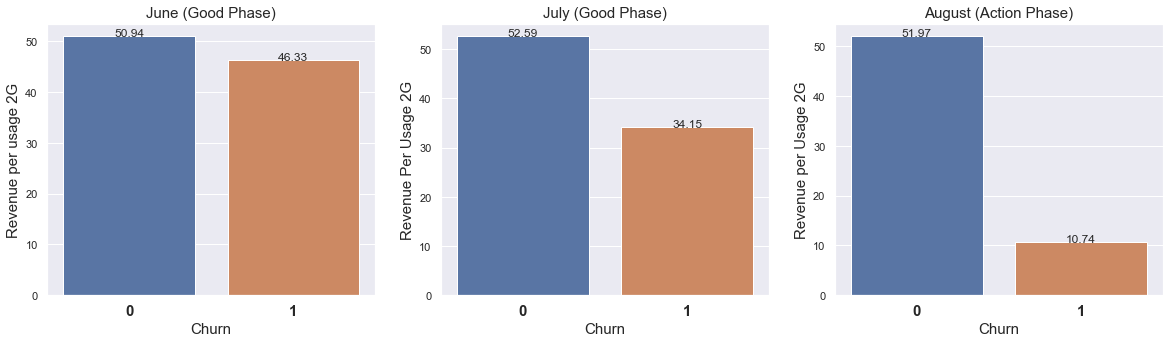

In [109]:
# Chruned Customers for 2G

plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "arpu_2g_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Revenue per usage 2G', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "arpu_2g_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Revenue Per Usage 2G', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "arpu_2g_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Revenue per Usage 2G', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [110]:
percent_drop = round(100*(10.74-(46.33+34.15)/2)/10.74)
print("Percentage drop in 2G arpu between good and action phase is: ",percent_drop)

Percentage drop in 2G arpu between good and action phase is:  -275


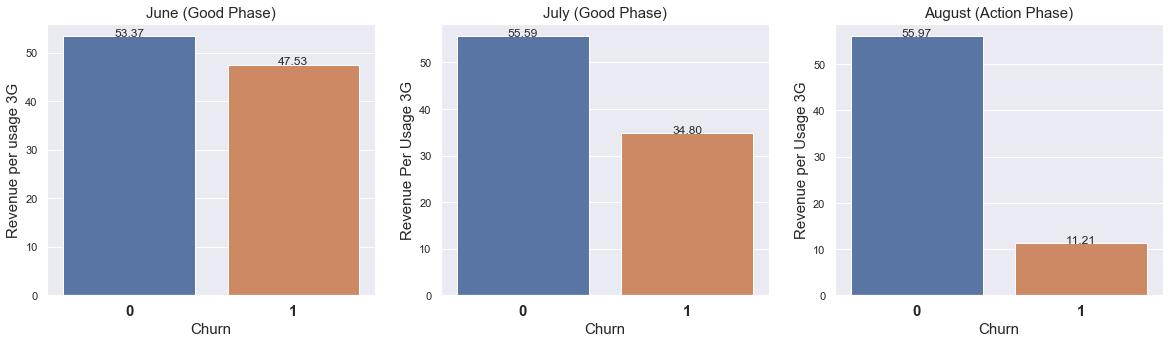

In [111]:
# Chruned Customers for 3G
plt.figure(figsize=(20,5))  # Figure Size
plt.subplot(1,3,1)
# June Month
ax = sns.barplot(x = "churn", y = "arpu_3g_6", data = df_telecom_highvalue, ci = None)
plt.title('June (Good Phase)', fontsize=15)
plt.ylabel('Revenue per usage 3G', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height+ 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
    
plt.subplot(1,3,2)
# July Month
ax = sns.barplot(x = "churn", y = "arpu_3g_7", data = df_telecom_highvalue, ci = None)
plt.title('July (Good Phase)', fontsize=15)
plt.ylabel('Revenue Per Usage 3G', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 

plt.subplot(1,3,3)
# August Month
ax = sns.barplot(x = "churn", y = "arpu_3g_8", data = df_telecom_highvalue, ci = None)
plt.title('August (Action Phase)', fontsize=15)
plt.ylabel('Revenue per Usage 3G', fontsize=15)
plt.xlabel('Churn', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)
total = float(len(df_telecom_highvalue))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 0.0003,
            '{:1.2f}'.format((height)),          
            ha="center") 
plt.show()

In [112]:
percent_drop = round(100*(11.21-(47.53+34.8)/2)/11.21)
print("Percentage drop in 3G arpu between good and action phase is: ",percent_drop)

Percentage drop in 3G arpu between good and action phase is:  -267


In [113]:
df_telecom_highvalue.shape

(28788, 140)

__Observations:__ Based on above analysis across different variables, it is clearly evident that the drop from good phase to test phase is very high for churned customers compared to Non-churned customers. Some of the reasons could be as 
follows.:
1. The drop from good phase to action phase in 2G customers is relatively low compared to 3G customers, which means the churned customers must be using 3G services and the 3G network in thier area must be not good.
2. Since majority of the churned customers are of less than 1500 days of age on network, these customers may be looking for 3G services
3. Off-network droppage is higher than the on-netwoek minutes of usage
4. Overall activity between good phase and action phase dropped in the range of 150% to 300+%. We have observed a higher percentage of drop in data recharges compared to call recharges. Also, this high drop in data recharges is largely led by 2G volumes
5. However, drop in average revenue per 2G user is less compared to 3G customer. Therefore, we can safely assume that company's 3G offerings are expensive compared to its 2G offerings

In [114]:
df_telecom_highvalue.shape

(28788, 140)

#### Column 19:  `Dropping Date Columns`

In [115]:
# Delete date columns as we have deried new variables using them
df_telecom_highvalue.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8', 'date_of_last_rech_data_6',
                           'date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1, inplace=True)

In [116]:
df_telecom_highvalue.drop('circle_id', axis = 1, inplace = True)

In [117]:
df_telecom_highvalue.shape

(28788, 130)

<h1 align="center"> <font color = green> Problem Statement 1: Churn Prediction </font> </h1>

In problem - 1, our aim is to predict the `next possible churn`. We will follow the steps mentioned below to achieve the optimal performing model estimates.
1. Train Test Split
2. `SMOTE MODELING`: It is a type of bootstrapping data with similar values rather than duplicates. Since we have a lot of imbalance in the data that we observed earlier, we will use SMOTE modeling to make `Churn: No Churn` ratio as `50:50` of data.
3. `Scaling:` Here we are using `StandardScaler` which makes the data with 0 mean and 1 standard deviation z-scores
4. `PCA`: As we have so many columns, this is performed to make `dimensionality reduction`
5. `Model Building Exercise`: Choosing Models- We choose different models to work with
    1. `GridSearch: Logistic`
    2. `GridSearch: Randomforest`
6. Choose the best model and fine tune hyper parameters and retrain with complete data
7. Model Evaluation: Basing on Accuracy, Precision and Recall
8. Choose a model basing on the metrics

__Note:__ A few steps may be clubbed with each other.

## 5.1. `Train - Test Split`

In [118]:
# Response variable
y = df_telecom_highvalue['churn']
# Feature variable
x = df_telecom_highvalue.drop('churn', axis=1)

In [119]:
# Import required libraries
# to scale data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# to split data
from sklearn.model_selection import train_test_split
# RFE
from sklearn.feature_selection import RFE
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# metrics
from sklearn import metrics


In [120]:
# Split the data between train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 10)

### 5.2 `Synthetic Minority Over-Sampling Technique - SMOTE MODELING`
Smote uses similar data to balance datasets rather than boot strapping where duplicates are created. Observe that, we are `performing smote modeling only on train data`. 

__Reason:__ We only need balanced data set for training the model estimates. There is no point in using the SMOTE before split.

In [121]:
# Let us have a look at y_train value counts before performing SMOTE
print('Pre Smote Value Count Percentage for Churn')
100 * y_train.value_counts()/ y_train.shape[0]

Pre Smote Value Count Percentage for Churn


0    91.891221
1     8.108779
Name: churn, dtype: float64

In [122]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)

In [123]:
# Check for class imbalace after smote
print('Post Smote Value Count Percentage for Churn')
print((y_train != 0).sum()/(y_train == 0).sum())

Post Smote Value Count Percentage for Churn
1.0


__Remarks:__ We can see that, SMOTE has done the job and equally balanced the dataset.

## 5.3. `Scaling Data - Standard Scaler`



In [124]:
# Scale variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 5.4. `Principal Component Analysis (PCA)`
Principal Component Analysis is a `dimensionality reduction technique`. When we have large number of features. It is always advisable to reduce the dimensions to a lesser number for the following reasons.
1. `Computational Efficiency`
2. `Handling Multi-Collinearity among features`

Similarly, `the limitations include loss of real definitions of predictor variables`. We have to do a different modeling to get the predictor variables.

In [125]:
# Import required libraries for PCA
from sklearn.decomposition import PCA

In [126]:
# Take the PCA solver into a variable named `PCA`
pca = PCA(svd_solver = 'randomized', random_state = 10)

In [127]:
# Perform PCA on the train data set
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=10,
    svd_solver='randomized', tol=0.0, whiten=False)

In [128]:
pca.components_

array([[-7.49145147e-17, -4.44089210e-16, -1.11022302e-16, ...,
        -3.70198914e-02, -2.01542274e-02, -2.87405111e-02],
       [ 6.53542213e-17,  1.11022302e-16,  0.00000000e+00, ...,
         2.24345858e-02,  1.59310352e-02,  4.53148122e-03],
       [ 2.04549759e-18, -1.00613962e-16, -0.00000000e+00, ...,
        -5.51100666e-02, -1.14356098e-02, -4.33670441e-02],
       ...,
       [ 0.00000000e+00,  4.24152609e-01, -7.70933919e-02, ...,
         2.60538119e-14,  4.95090080e-15, -3.92047506e-16],
       [-0.00000000e+00,  9.49575821e-02,  3.19703801e-01, ...,
        -2.58473798e-16, -2.11175478e-16, -2.48065457e-16],
       [ 0.00000000e+00, -1.90672236e-06,  1.28355591e-05, ...,
         4.48398066e-20,  1.41613321e-21, -8.49679925e-21]])

#### Explaining Variance and Choosing Principal Components*
1. Each Principal Component explains certain amount of information (called variance) in the data.
2. The variance explained is in decreasing order with each principal component (PC).
3. PC1 explains more than PC2 and so on. `Variance Explained(PC1>PC2>PC3......)`

In [129]:
# Let us look at how much first 20 principal components explained independently
pca.explained_variance_ratio_[0:20]

array([0.11950388, 0.10488386, 0.06237727, 0.05266703, 0.03812416,
       0.03467965, 0.03128055, 0.02759676, 0.02436484, 0.02333134,
       0.02221898, 0.0212416 , 0.01996841, 0.01747979, 0.01685878,
       0.01634198, 0.01587445, 0.01553864, 0.01401707, 0.01356205])

#### Scree Plot: Cumulative sum of Variances for each PC to understand how many PC's explained how much variance/information

In [130]:
#Let's check the variance ratios explained by PCA
variance_explained_till_pca = {'PC-10':round(pca.explained_variance_ratio_[0:10].sum(),2), 
                               'PC-20':round(pca.explained_variance_ratio_[0:20].sum(),2),
                               'PC-30':round(pca.explained_variance_ratio_[0:30].sum(),2), 
                               'PC-40':round(pca.explained_variance_ratio_[0:40].sum(),2),
                               'PC-50':round(pca.explained_variance_ratio_[0:50].sum(),2),
                               'PC-60':round(pca.explained_variance_ratio_[0:60].sum(),2),
                               'PC-70':round(pca.explained_variance_ratio_[0:70].sum(),2)}
variance_explained_till_pca

{'PC-10': 0.52,
 'PC-20': 0.69,
 'PC-30': 0.8,
 'PC-40': 0.87,
 'PC-50': 0.92,
 'PC-60': 0.95,
 'PC-70': 0.97}

__Remarks:__ We can observe that
1. Half of the variance in data is explained in first `10 principal components.`
2. 90% variance explained in 50 principal components.

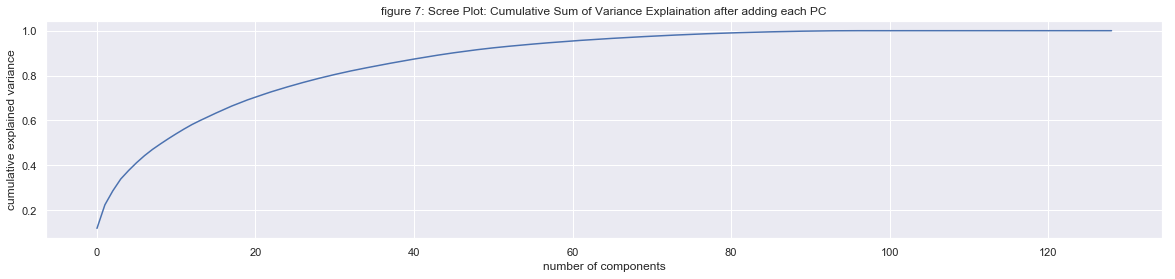

In [131]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (20,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('figure 7: Scree Plot: Cumulative Sum of Variance Explaination after adding each PC')
plt.show()


__Remarks:__ 
1. From the cumsum data and the graph, we choose `50 principal components` to work with. After which variance explaination is slowed down.
2. We chose this basing on the fact that, it a balance of convergance and atleast 90% variance is explained.

#### Scatter Plot: How Principal Components are scattered

In [132]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0], 'PC2':pca.components_[1]})

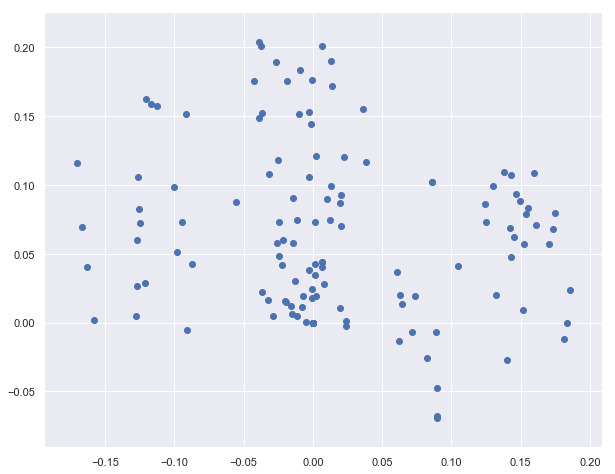

In [133]:
fig = plt.figure(figsize=(10,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.show()

### `Fit the PCA`

In [134]:
# use incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 50)

In [135]:
df_train_pca = pca_final.fit_transform(x_train)

### Check for multi-collinearity
One of the aims of PCA is to handle multi-collinearity in the data. After PCA, data should have very less `correlation coefficients`. Let us look at the heat maps to get an idea.

In [136]:
# Check for correlation between principal components
corrmat = np.round(np.corrcoef(df_train_pca.transpose()),2)

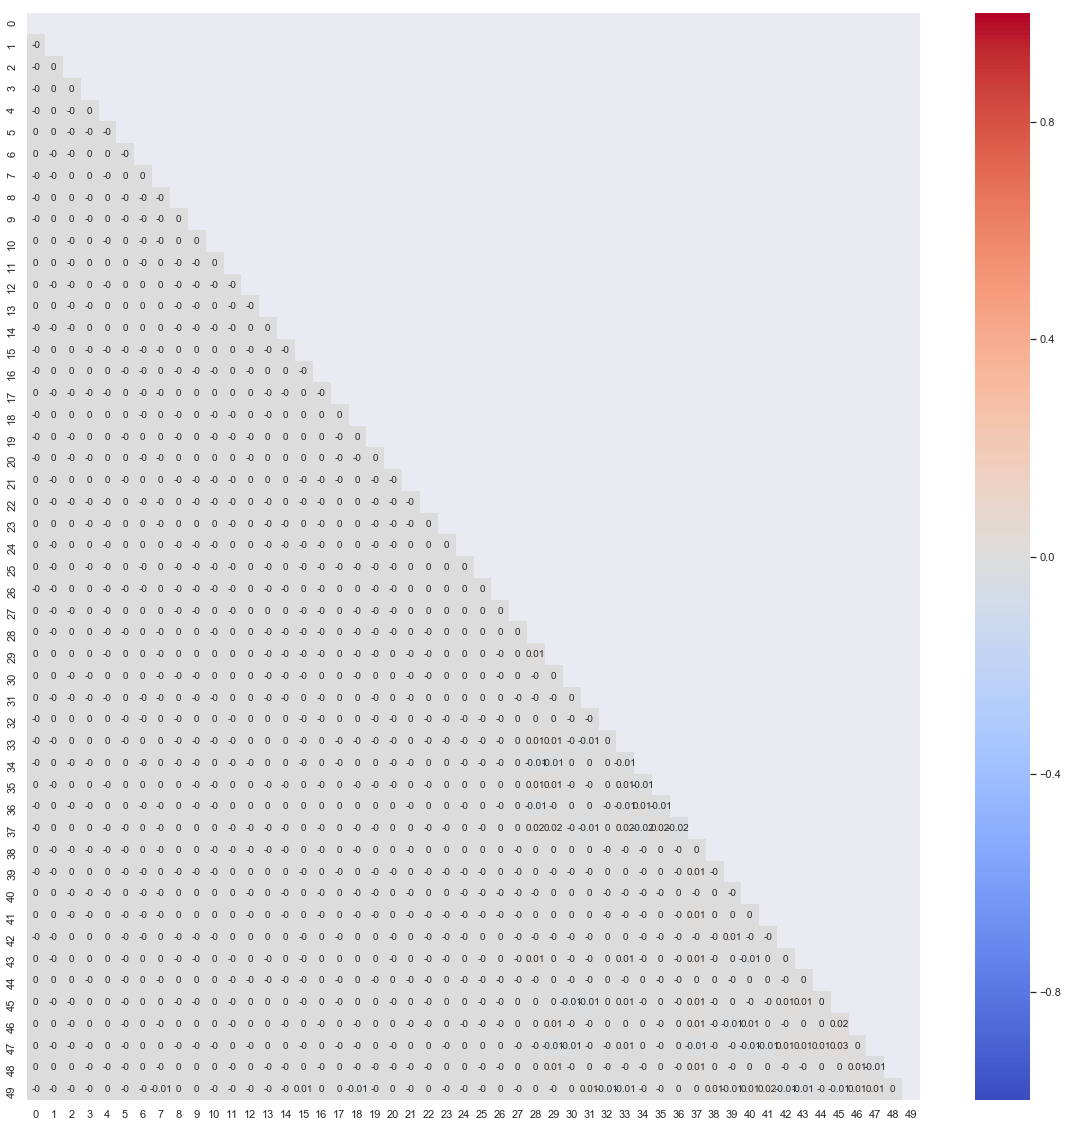

In [137]:
# Plot the correlation matrix
plt.figure(figsize = (20,20))
#sns.heatmap(corrmat, annot= True)

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);


In [138]:
# Check for min and max correlation coefficients
corrmat_nondiag = corrmat - np.diagflat(corrmat.diagonal())
print("Maximum Correlation: ", corrmat_nondiag.max())
print("Minimum Correlation: ",corrmat_nondiag.min())

Maximum Correlation:  0.03
Minimum Correlation:  -0.02


__Remarks:__ As we can see from the heatmap that
1. Almost every PCA is independent of others. `Every correlation is almost zeros.` 
2. Among the correlated few, the `min and max correlations are very close to zero`. 

So, we can safely say that there is __`no multicollinearity among principal components`__

#### Transforming Test data to PC's

In [139]:
# Apply these principle components on test data
df_test_pca = pca_final.transform(x_test)

## 5.5.`Model Building Exercise`- Choosing Models

It is a practiced in the industry to work with all possible ML algorithms that work for the problem statement. Choose few best algorithms for the respective problem statement and further work with it. For the current problem, We can work with
1. Logistic Regression
2. Support Vector Machines
3. Decision Trees
4. Random Forests

__Limitation:__ Building these many models with hyper-parameter tuning is very machine heavy (computationally intensive). This is not within the scope of an academic project. For that reason, we are following the below criteria.

__Model Building Steps:__
1. Choose any 2 models to imitate the `choosing models activity`. In our case, let us choose
    1. `Logistic Regression:` This is a linear Model
    2. `Random Forest:` This can handle non-linearity in the model
2. Perform `GridSearchCV` for hyper parameter tuning for each model distinctly.
    1. Logistic Regression with GridSearch
    2. Random Forest with GridSearch
3. Choose the best set of parameters
4. Retrain the train data without K-fold
5. Evaluate metrics
6. Choose the best of the two.

__Note:__ We will perform these steps for each model sequentially.

In [118]:
# Response variable
y = df_telecom_highvalue['churn']
# Feature variable
x = df_telecom_highvalue.drop('churn', axis=1)

In [119]:
# Import required libraries
# to scale data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# to split data
from sklearn.model_selection import train_test_split
# RFE
from sklearn.feature_selection import RFE
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# metrics
from sklearn import metrics


In [120]:
# Split the data between train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 10)

### 5.2 `Synthetic Minority Over-Sampling Technique - SMOTE MODELING`
Smote uses similar data to balance datasets rather than boot strapping where duplicates are created. Observe that, we are `performing smote modeling only on train data`. 

__Reason:__ We only need balanced data set for training the model estimates. There is no point in using the SMOTE before split.

In [121]:
# Let us have a look at y_train value counts before performing SMOTE
print('Pre Smote Value Count Percentage for Churn')
100 * y_train.value_counts()/ y_train.shape[0]

Pre Smote Value Count Percentage for Churn


0    91.891221
1     8.108779
Name: churn, dtype: float64

In [122]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)

In [123]:
# Check for class imbalace after smote
print('Post Smote Value Count Percentage for Churn')
print((y_train != 0).sum()/(y_train == 0).sum())

Post Smote Value Count Percentage for Churn
1.0


__Remarks:__ We can see that, SMOTE has done the job and equally balanced the dataset.

## 5.3. `Scaling Data - Standard Scaler`



In [124]:
# Scale variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 5.4. `Principal Component Analysis (PCA)`
Principal Component Analysis is a `dimensionality reduction technique`. When we have large number of features. It is always advisable to reduce the dimensions to a lesser number for the following reasons.
1. `Computational Efficiency`
2. `Handling Multi-Collinearity among features`

Similarly, `the limitations include loss of real definitions of predictor variables`. We have to do a different modeling to get the predictor variables.

In [125]:
# Import required libraries for PCA
from sklearn.decomposition import PCA

In [126]:
# Take the PCA solver into a variable named `PCA`
pca = PCA(svd_solver = 'randomized', random_state = 10)

In [127]:
# Perform PCA on the train data set
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=10,
    svd_solver='randomized', tol=0.0, whiten=False)

In [128]:
pca.components_

array([[-7.49145147e-17, -4.44089210e-16, -1.11022302e-16, ...,
        -3.70198914e-02, -2.01542274e-02, -2.87405111e-02],
       [ 6.53542213e-17,  1.11022302e-16,  0.00000000e+00, ...,
         2.24345858e-02,  1.59310352e-02,  4.53148122e-03],
       [ 2.04549759e-18, -1.00613962e-16, -0.00000000e+00, ...,
        -5.51100666e-02, -1.14356098e-02, -4.33670441e-02],
       ...,
       [ 0.00000000e+00,  4.24152609e-01, -7.70933919e-02, ...,
         2.60538119e-14,  4.95090080e-15, -3.92047506e-16],
       [-0.00000000e+00,  9.49575821e-02,  3.19703801e-01, ...,
        -2.58473798e-16, -2.11175478e-16, -2.48065457e-16],
       [ 0.00000000e+00, -1.90672236e-06,  1.28355591e-05, ...,
         4.48398066e-20,  1.41613321e-21, -8.49679925e-21]])

#### Explaining Variance and Choosing Principal Components*
1. Each Principal Component explains certain amount of information (called variance) in the data.
2. The variance explained is in decreasing order with each principal component (PC).
3. PC1 explains more than PC2 and so on. `Variance Explained(PC1>PC2>PC3......)`

In [129]:
# Let us look at how much first 20 principal components explained independently
pca.explained_variance_ratio_[0:20]

array([0.11950388, 0.10488386, 0.06237727, 0.05266703, 0.03812416,
       0.03467965, 0.03128055, 0.02759676, 0.02436484, 0.02333134,
       0.02221898, 0.0212416 , 0.01996841, 0.01747979, 0.01685878,
       0.01634198, 0.01587445, 0.01553864, 0.01401707, 0.01356205])

#### Scree Plot: Cumulative sum of Variances for each PC to understand how many PC's explained how much variance/information

In [130]:
#Let's check the variance ratios explained by PCA
variance_explained_till_pca = {'PC-10':round(pca.explained_variance_ratio_[0:10].sum(),2), 
                               'PC-20':round(pca.explained_variance_ratio_[0:20].sum(),2),
                               'PC-30':round(pca.explained_variance_ratio_[0:30].sum(),2), 
                               'PC-40':round(pca.explained_variance_ratio_[0:40].sum(),2),
                               'PC-50':round(pca.explained_variance_ratio_[0:50].sum(),2),
                               'PC-60':round(pca.explained_variance_ratio_[0:60].sum(),2),
                               'PC-70':round(pca.explained_variance_ratio_[0:70].sum(),2)}
variance_explained_till_pca

{'PC-10': 0.52,
 'PC-20': 0.69,
 'PC-30': 0.8,
 'PC-40': 0.87,
 'PC-50': 0.92,
 'PC-60': 0.95,
 'PC-70': 0.97}

__Remarks:__ We can observe that
1. Half of the variance in data is explained in first `10 principal components.`
2. 90% variance explained in 50 principal components.

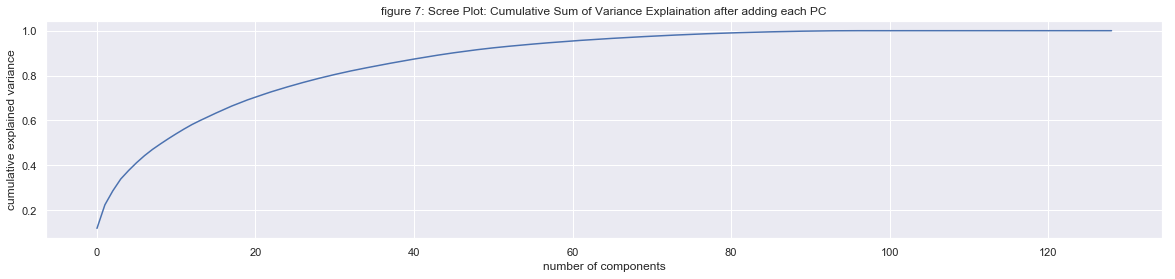

In [131]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (20,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('figure 7: Scree Plot: Cumulative Sum of Variance Explaination after adding each PC')
plt.show()


__Remarks:__ 
1. From the cumsum data and the graph, we choose `50 principal components` to work with. After which variance explaination is slowed down.
2. We chose this basing on the fact that, it a balance of convergance and atleast 90% variance is explained.

#### Scatter Plot: How Principal Components are scattered

In [132]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0], 'PC2':pca.components_[1]})

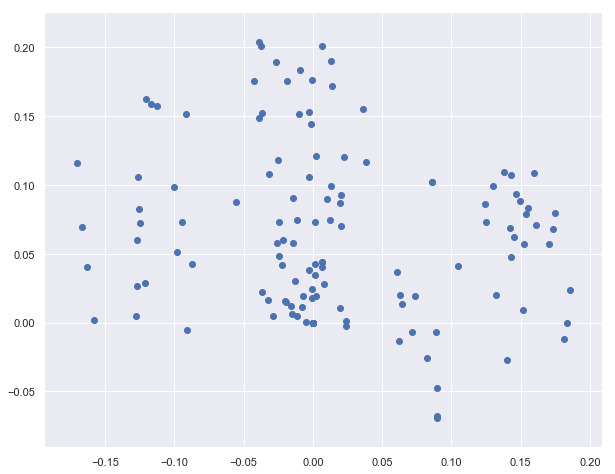

In [133]:
fig = plt.figure(figsize=(10,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.show()

### `Fit the PCA`

In [134]:
# use incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 50)

In [135]:
df_train_pca = pca_final.fit_transform(x_train)

### Check for multi-collinearity
One of the aims of PCA is to handle multi-collinearity in the data. After PCA, data should have very less `correlation coefficients`. Let us look at the heat maps to get an idea.

In [136]:
# Check for correlation between principal components
corrmat = np.round(np.corrcoef(df_train_pca.transpose()),2)

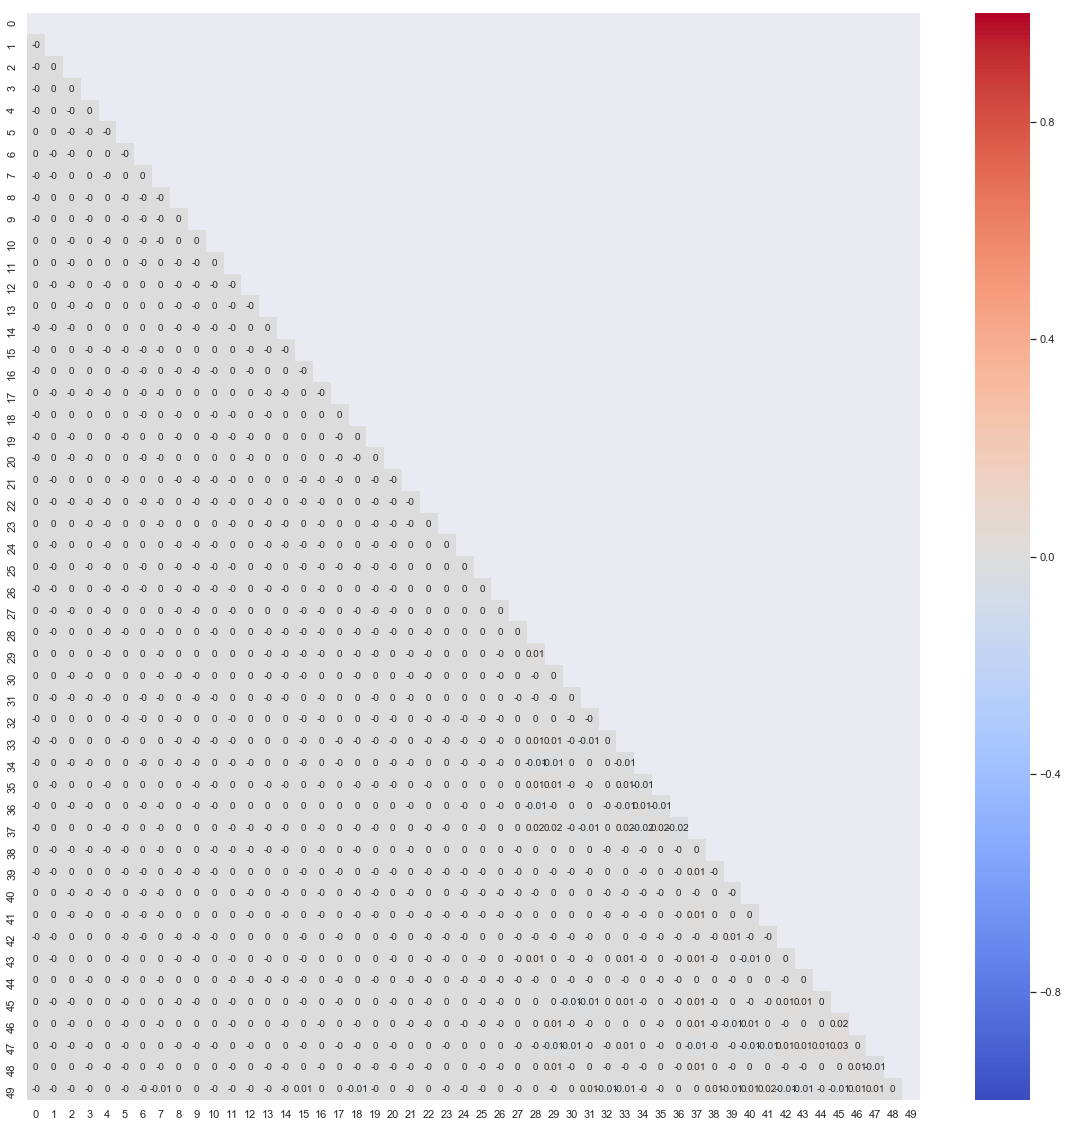

In [137]:
# Plot the correlation matrix
plt.figure(figsize = (20,20))
#sns.heatmap(corrmat, annot= True)

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);


In [138]:
# Check for min and max correlation coefficients
corrmat_nondiag = corrmat - np.diagflat(corrmat.diagonal())
print("Maximum Correlation: ", corrmat_nondiag.max())
print("Minimum Correlation: ",corrmat_nondiag.min())

Maximum Correlation:  0.03
Minimum Correlation:  -0.02


__Remarks:__ As we can see from the heatmap that
1. Almost every PCA is independent of others. `Every correlation is almost zeros.` 
2. Among the correlated few, the `min and max correlations are very close to zero`. 

So, we can safely say that there is __`no multicollinearity among principal components`__

#### Transforming Test data to PC's

In [139]:
# Apply these principle components on test data
df_test_pca = pca_final.transform(x_test)

## 5.5.`Model Building Exercise`- Choosing Models

It is a practiced in the industry to work with all possible ML algorithms that work for the problem statement. Choose few best algorithms for the respective problem statement and further work with it. For the current problem, We can work with
1. Logistic Regression
2. Support Vector Machines
3. Decision Trees
4. Random Forests

__Limitation:__ Building these many models with hyper-parameter tuning is very machine heavy (computationally intensive). This is not within the scope of an academic project. For that reason, we are following the below criteria.

__Model Building Steps:__
1. Choose any 2 models to imitate the `choosing models activity`. In our case, let us choose
    1. `Logistic Regression:` This is a linear Model
    2. `Random Forest:` This can handle non-linearity in the model
2. Perform `GridSearchCV` for hyper parameter tuning for each model distinctly.
    1. Logistic Regression with GridSearch
    2. Random Forest with GridSearch
3. Choose the best set of parameters
4. Retrain the train data without K-fold
5. Evaluate metrics
6. Choose the best of the two.

__Note:__ We will perform these steps for each model sequentially.

### 5.5.1. `Logistic Regression`

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

LR_with_PCA = LogisticRegression(random_state=10)
C=list(np.power(10.0, np.arange(-4, 4)))
n_folds = 5
gs = GridSearchCV(LR_with_PCA,
    param_grid=[{'C': C, 'penalty': ['l1', 'l2']}],
    cv= n_folds,                 
    scoring='accuracy',
    n_jobs= 1,
    verbose=1,
    refit=True,
    return_train_score = True)

In [141]:
# Fit the Model
LR_with_PCA_model = gs.fit(df_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   14.5s finished


__Remarks:__ 
1. Logistic Regression is a simple linear model. It took not more that a min to perform 5 fold grid search.
2. Hyperparameters include 
    1. `l1` and `l2` regularizations
    2. Regularization parameter `C` from $10^{-4}$ to $10^{4}$ 

In [142]:
# cv results
cv_results = pd.DataFrame(LR_with_PCA_model.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [143]:
# Get the important columns out
cv_results_important = cv_results[['param_C', 'param_penalty',
                                   'mean_train_score','std_train_score',
                                   'mean_test_score','std_test_score',
                                   'rank_test_score']]
cv_results_important.sort_values('rank_test_score').head()

,param_C,param_penalty,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
7,0.1,l2,0.845676,0.001121,0.844764,0.003411,1
9,1,l2,0.845790,0.001138,0.844764,0.003426,1
11,10,l2,0.845790,0.001123,0.844764,0.003426,1
10,10,l1,0.845790,0.001123,0.844737,0.003430,4
12,100,l1,0.845804,0.001122,0.844737,0.003430,4


__Remarks:__ We know that lower the C, higher the regularization strength. In our case, 
1. C >= 1 faired well for both l1 and l2 regularizations.
2. This suggests that `all the features have some prominance in modeling`. It did not regularize much.
3. It makes sense because `we already handled colinearity and unwanted features using PCA`

<font color = Red> Note: Since we have observed change in results after every run ! The results we got, we happend to analyse it </font>

#### Collect L1 and L2 Regularizations in different dataframes

In [144]:
cv_results_l1 = cv_results[cv_results_important['param_penalty'] == 'l1']
cv_results_l2 = cv_results[cv_results_important['param_penalty'] == 'l2']

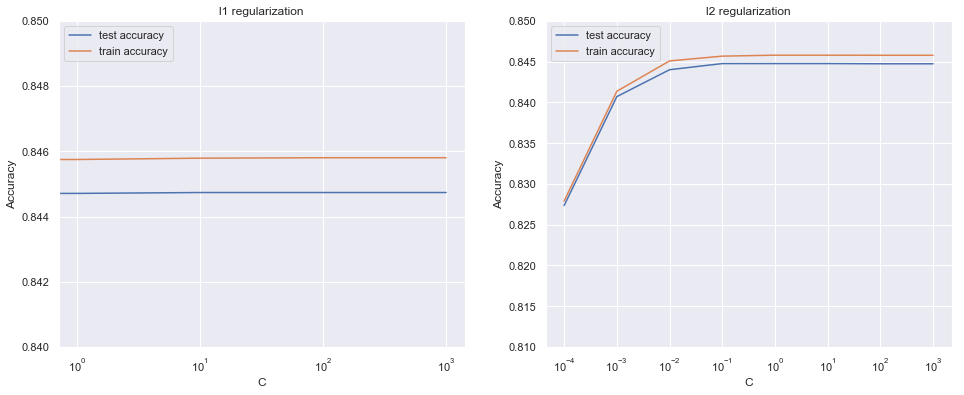

In [145]:
# converting C to numeric type for plotting on x-axis
cv_results_l1['param_C'] = cv_results_l1['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(121)
l1 = cv_results_l1

plt.plot(l1["param_C"], l1["mean_test_score"])
plt.plot(l1["param_C"], l1["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("l1 regularization")
plt.ylim([0.84, 0.85])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(122)
l2 = cv_results_l2

plt.plot(l2["param_C"], l2["mean_test_score"])
plt.plot(l2["param_C"], l2["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("l2 regularization")
plt.ylim([0.81, 0.85])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')




__Remarks:__
1. It feels like `L1 Regularization` has not impacted performance in anyway.
2. In. case of `L2` Regularization. There is a trade off here
    1. If train-test difference is taken as priority: `Regularization with lesser C worked well` but with lesser accuracy
    2. If higher accuracy is priritized, `C = 1 is doing good.`

Let us take `C = 1` and `L2 Regularization` as best values. 

#### Extract the best Params

In [146]:
# printing the optimal accuracy score and hyperparameters
best_score = LR_with_PCA_model.best_score_
best_hyperparams = LR_with_PCA_model.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.844764270670195 corresponding to hyperparameters {'C': 0.1, 'penalty': 'l2'}


In [147]:
# Fit the model with best hyper parameters
# specify optimal hyperparameters

# model
LR = LogisticRegression(penalty = 'l2', C = 1.0, random_state=10)
LR_PCA_final = LR.fit(df_train_pca, y_train)

#### Compute and Compare `Train - Test Accuracies`

In [148]:
# Let us compute the train - test accuracies
predict_prob_train = LR_PCA_final.predict_proba(df_train_pca)[:,1]
predict_prob_test = LR_PCA_final.predict_proba(df_test_pca)[:,1]

In [149]:
# Check the accuracy
print('The accuracy for train data is', round(100*metrics.roc_auc_score(y_train, predict_prob_train),2))
print('The accuracy for test data is', round(100*metrics.roc_auc_score(y_test, predict_prob_test),2))

The accuracy for train data is 91.34
The accuracy for test data is 88.94


__Remarks:__ There is substantial difference in train - test accuracies. We should `see the following metrics and models before we pick this model as a predictor model`.

In [150]:
# Create a data frame with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_prob':predict_prob_train})


#### `ROC Curve1 to Capture the best probability cut-off

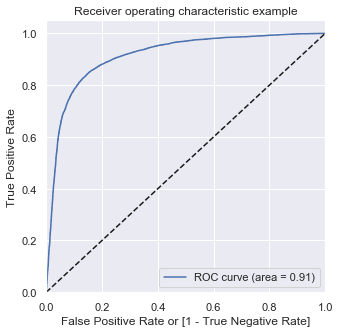

In [151]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

__Remarks:__ At P = 0.6, The predictive power of model is stabilizing. So, let us take probability cutoff for churn:n0n churn as `P = 0.6`

In [152]:
# Create columns with different probability cutoffs
numbers = [float(x)/10 for x in range (10)]
for i in numbers: 
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.016600,1,0,0,0,0,0,0,0,0,0
1,0,0.144994,1,1,0,0,0,0,0,0,0,0
2,0,0.073292,1,0,0,0,0,0,0,0,0,0
3,0,0.097973,1,0,0,0,0,0,0,0,0,0
4,0,0.136182,1,1,0,0,0,0,0,0,0,0


#### Sensitivity Vs Specificity Vs Accuracy Trade Off

In [153]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.711859     0.976292     0.447427
0.2   0.2  0.775369     0.953502     0.597235
0.3   0.3  0.808959     0.925636     0.692283
0.4   0.4  0.832289     0.897014     0.767565
0.5   0.5  0.845331     0.862721     0.827942
0.6   0.6  0.846546     0.815197     0.877896
0.7   0.7  0.833315     0.750554     0.916077
0.8   0.8  0.800427     0.653076     0.947778
0.9   0.9  0.647189     0.314306     0.980072


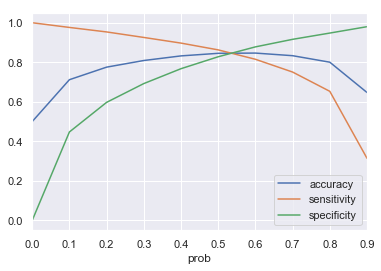

In [154]:
# Curve
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
plt.show()

__Conclusion:__ 
1. The `ROC Curve` suggests the best probability range as `p = [0.5 - 0.6]
2. The `Sensitivity Vs Specificity and Accuracy` curves converge at `0.55` exactly.

We will take `P = 0.55` as our final probability to estimate model accuracies.

In [155]:
y_train_pred_final['Final_Predict'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>=0.55 else 0)

In [156]:
# Final DataFrame
www = list(y_train_pred_final.columns)
y_train_pred_final.drop(www[2:-1],axis = 1, inplace = True)
y_train_pred_final.head()

,Churn,Churn_prob,Final_Predict
0,0,0.016600,0
1,0,0.144994,0
2,0,0.073292,0
3,0,0.097973,0
4,0,0.136182,0


## Accuracy Score Cross Check
Compute the accuracy, precision and recall scores using 
1. Inbuilt functions 
2. Manually
and cross check manually

In [157]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

Precision_sklearn = round(100*precision_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predict),1)
Recall_sklearn = round(100*recall_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predict),1)
Accuracy_sklearn = accuracy_score(y_train_pred_final.Churn,y_train_pred_final.Final_Predict)

print('Accuracy_sklearn',Precision_sklearn)
print('Precision_sklearn',Precision_sklearn)
print('Recall_sklearn',Recall_sklearn)

Accuracy_sklearn 85.3
Precision_sklearn 85.3
Recall_sklearn 84.1


__Remarks:__ These are the precision, recall and accuracy from sklearn. We should see whether it matches our results

In [158]:
con_mat2 = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.Final_Predict)
con_mat2
TP = con_mat2[1,1] # true positive 
TN = con_mat2[0,0] # true negatives
FP = con_mat2[0,1] # false positives
FN = con_mat2[1,0] # false negatives

#### Computing `Accuracy`, `Precision` and `Recall`

In [159]:
# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predict)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)


# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [160]:
Metrics_train = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}

Metrics_train

{'Accuracy': 84.8, 'Precision': 85.0, 'Recall': 84.1}

#### Verifying our choice of probabilities with `Precision and Recall Curve`

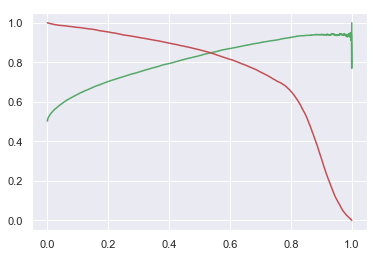

In [161]:
# Import precision recall curve
from sklearn.metrics import precision_recall_curve
p,r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

__Remarks:__ We can say from `Precision and Recall trade off` that they both converge at 0.55.  This reassures our choice of P=0.55. We focus on the basis of `Recall`. Now let us see <font color = Red> why we chose `Recall` as our primary metric? </font>

Our aim in the work is `to predict as many churns as possible`.
- This also means `Reducing false negative and increasing true positive number` which exactly `Recall` does.
- We can also see that `Recall` is higher which is desirable.

#### <font color = blue> We conclude that our `P = 0.55` as the best probability cutoff. Let us compute test scores to see how best is the model.

#### Estimating the `performance of model on test data`

In [162]:
df_test_pca[0:1]

array([[ 1.73244661e+00,  4.61298484e+00, -8.44888660e-01,
         9.27521807e-01, -1.09390697e+00,  1.62082222e+00,
        -7.15561692e-01, -2.45804123e+00, -3.42851977e+00,
         1.34425710e+00, -2.72385516e+00, -1.22935672e+00,
         2.03965579e+00, -1.38490048e+00,  3.40647313e+00,
         3.97772630e-01, -3.73624490e-01,  1.64240558e-01,
         9.60126677e-01, -8.80376710e-01, -3.95532394e-03,
        -2.29534707e+00,  4.15748681e-02, -1.49865941e+00,
         3.34755451e-01, -2.94015110e-02,  6.23987016e-01,
        -1.93858028e-01, -8.19393361e-01,  2.19037416e+00,
         1.11992246e+00,  1.85789132e-01, -1.61402318e-01,
        -4.94456338e-01,  2.44680226e-01,  5.96067022e-01,
         2.47550844e-01, -7.52906410e-02,  2.22967841e-01,
         5.68320916e-01,  1.50973525e+00, -3.62768086e-01,
        -1.01834434e+00, -5.00460812e-01, -3.02561300e-01,
         4.45626334e-01, -1.32419074e-01,  2.65880284e-01,
         1.10439852e-01,  1.11327622e+00]])

#### Make a dataframe of test results 
Dataframe shoud include:
1. Test Churn Value
2. Test Churn predicted value

##### Predictions for test data

In [163]:
### Predict the y test values
y_test_pred = LR_PCA_final.predict(df_test_pca)

# Convert y_pred to a data frame which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# View the dataframe
y_pred_1.head(2)

,0
0,0
1,0


#### Dataframe of all results

In [164]:
# Convert y_test to a Dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace = True)


In [165]:
# Append y_pred_1 and y_test_df
y_pred_final = pd.concat([y_test_df,y_pred_1], axis=1)
y_pred_final.head()

,mobile_number,churn,0
0,7000121948,0,0
1,7001009062,0,0
2,7000759321,0,0
3,7000459063,0,0
4,7001188406,0,0


In [166]:
# Rename the column
y_pred_final = y_pred_final.rename(columns={0 :'Churn_Predict'})
y_pred_final.head()

,mobile_number,churn,Churn_Predict
0,7000121948,0,0
1,7001009062,0,0
2,7000759321,0,0
3,7000459063,0,0
4,7001188406,0,0


In [167]:
y_pred_final['Final_pred'] = y_pred_final.Churn_Predict.map(lambda x: 1 if x >= 0.55 else 0 )
y_pred_final.head()

,mobile_number,churn,Churn_Predict,Final_pred
0,7000121948,0,0,0
1,7001009062,0,0,0
2,7000759321,0,0,0
3,7000459063,0,0,0
4,7001188406,0,0,0


__Remarks:__ Now that we have `churn Vs churn predict data` at one place. Let us compute the metrics

#### `Test Metrics Computation`
The steps for this metrics computation are
1. Extract `Confusion Matrix`
2. Compute `Metrics`

In [168]:
# Extract Confusion Matrix
con_mat3 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.Churn_Predict)
con_mat3

array([[6649, 1325],
       [ 128,  535]])

In [169]:
TP = con_mat3[1,1] # true positive 
TN = con_mat3[0,0] # true negatives
FP = con_mat3[0,1] # false positives
FN = con_mat3[1,0] # false negatives

# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predict)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)


# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

#### Compare the metrics for Train test Scores 

In [170]:
Metrics_test = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}
print('Test Metrics:', Metrics_test)
print('Train Metrics', Metrics_train)

Test Metrics: {'Accuracy': 84.8, 'Precision': 29.0, 'Recall': 80.7}
Train Metrics {'Accuracy': 84.8, 'Precision': 85.0, 'Recall': 84.1}


__Remarks:__
1. While accuracy is fine, `Precision` and `Recall` fell really bad in test data.
2. This is not ideal because `recall` is where we will know the `going to churn` customers more.
3. We have to odentify the `churning customers` appropriately if it is at the cost of `accuracy`.

Our aim in the work is `to predict as many churnable customers as possible`.
- This also means `Reducing false negative and increasing true positive number` which exactly `Recall` does.
- We can also see that `Recall` is higher which is desirable.

#### Let us look at random forest and see how better the results can be.

### 5.5.2. `Random Forest:`

In [171]:
# Import required libraries
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
# import classification report and confusion metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Let us re-iterate the steps in estimating a model that we performed in logistic regression. Steps include:
1. Random Forest with hyper-parameter tuning.
2. Comparing train-test scores
3. Finding the best hyper-parameters
4. Retraining the model with best hyper-parameters
5. Finding the train-test precision and accuracies 

__Note:__ We are using `Kfold = 3`. This is a good enough fold because we do not have class imbalance. Other than that, since the `random forest GridSearchCV` is time consuming.

#### `Hyperparameter Tuning with GridSearchCV`

In [173]:
# Create the parameter grid
param_grid = {
    'max_depth': [1,7,15],
    'min_samples_leaf': range(15, 50, 5),
    'min_samples_split': range(20, 40, 5),
    'n_estimators': [15], 
    'max_features': [10, 20, 5]
}

rf = RandomForestClassifier(random_state=10)
# run the grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, 
                          cv= 3, n_jobs=-1, 
                          verbose=1,
                          return_train_score = True)

In [174]:
# Fit the model to our data
rf_model = grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed:  9.6min finished


__Remarks:__ In this random forest, we limited our search to the following search due to less computational ability
1. 3 folds
2. Every other parameter only 3 different estimates



In [175]:
# cv results
cv_results_rf = pd.DataFrame(rf_model.cv_results_)
cv_results_rf.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [176]:
# Get the important columns out
cv_results_important_rf = cv_results_rf[['param_max_depth', 'param_max_features','param_min_samples_leaf',
                                   'param_min_samples_split','param_n_estimators',
                                   'mean_train_score','std_train_score',
                                   'mean_test_score','std_test_score',
                                   'rank_test_score']]
cv_results_important_rf.sort_values('rank_test_score').head(5)

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
197,15,20,15,25,15,0.936558,0.001134,0.898742,0.004518,1
196,15,20,15,20,15,0.936558,0.001134,0.898742,0.004518,1
198,15,20,15,30,15,0.936558,0.001134,0.898742,0.004518,1
169,15,10,15,25,15,0.931833,0.001395,0.898175,0.004240,4
170,15,10,15,30,15,0.931833,0.001395,0.898175,0.004240,4


__Remarks:__ We can see that, in the top 10 best models:
1. Hyper parameters: `param_max_depth = 10`,`param_min_samples_leaf = 100`, `param_min_samples_split = 200` are always constant. 
2. Hyper parameters: `param_max_features` and `param_n_estimators` kept varying.

We can say that, `param_max_features` and `param_n_estimators` might have been instrumental in determining the `train` and `test` Scores.

#### Plots of `Hyper Parameter Vs [Train - Test Scores]`

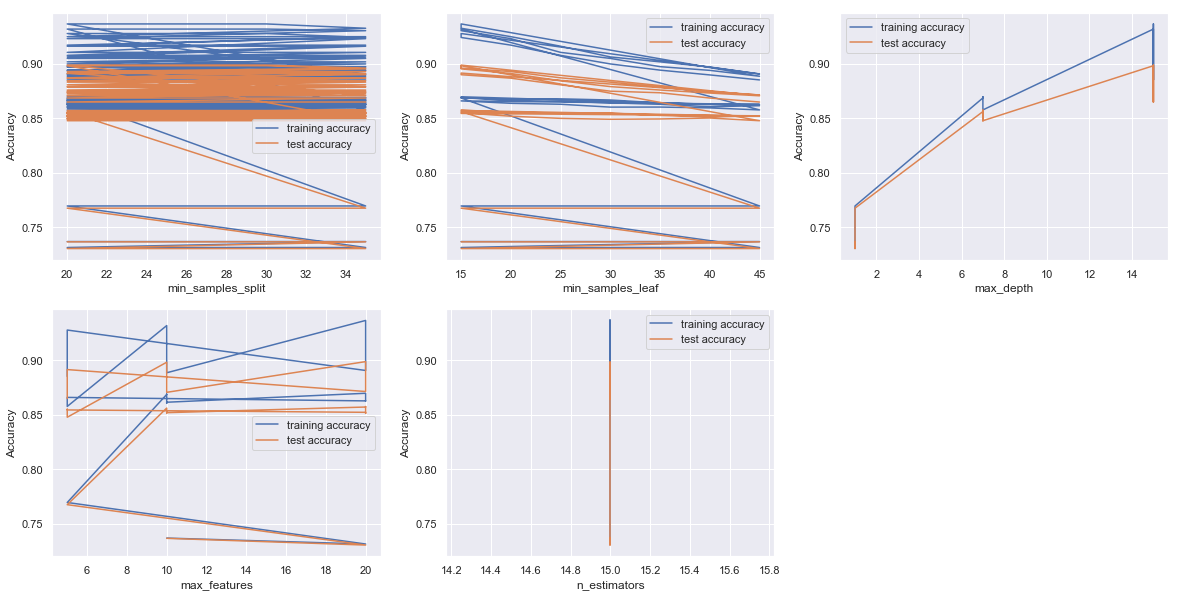

In [177]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(20,10))  # Figure Size
plt.subplot(2,3,1)

plt.plot(cv_results_important_rf["param_min_samples_split"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_min_samples_split"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,3,2)

plt.plot(cv_results_important_rf["param_min_samples_leaf"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_min_samples_leaf"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,3,3)

plt.plot(cv_results_important_rf["param_max_depth"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_max_depth"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(2,3,4)

plt.plot(cv_results_important_rf["param_max_features"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_max_features"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,3,5)

plt.plot(cv_results_important_rf["param_n_estimators"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_n_estimators"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()




plt.show()

__Remarks:__ This visualization makes it clear that, We have so many hyper-parameters that are simultaneously working.
1. We cannot decide looking at one particular hyper-parameter the effect on train-test scores.
2. Only `max_depth` is evidently effecting the scores in a pattern. As the depth increases, the scores increase but over fitting largely.
3. Anyway, We cannot interpret anything from these charts.

Let us take the best hyper-parameters basing on the accuracy scores from the previous dataframe as the best. We can derive the same from `best_params_`

#### `Extracting Best params`

In [178]:
# printing the optimal accuracy score and hyperparameters
best_score = rf_model.best_score_
best_hyperparams = rf_model.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8987416968191392 corresponding to hyperparameters {'max_depth': 15, 'max_features': 20, 'min_samples_leaf': 15, 'min_samples_split': 20, 'n_estimators': 15}


#### Retraining the model with best hyper-parameters

In [179]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=15, 
                             min_samples_split=20,
                             max_features=20,
                             n_estimators=15)

In [180]:
# fit the data
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Remarks:__ We estimated the parameters for the chosen hyperparameters `with complete train data`. Now let us see the results.

#### Computing the `Train - Test Precision and Accuracy`

In [181]:
# Predict the results on x_train
predict_train = rfc.predict(df_train_pca)

# Predict the results on x_test
predict_test = rfc.predict(df_test_pca)

#### Compare and Analyse the `Classification Report for Train and Test Data`

In [182]:
# Check results for train data
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     18517
           1       0.93      0.96      0.95     18517

    accuracy                           0.95     37034
   macro avg       0.95      0.95      0.95     37034
weighted avg       0.95      0.95      0.95     37034



In [183]:
# Check results for test data
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7974
           1       0.40      0.71      0.51       663

    accuracy                           0.89      8637
   macro avg       0.68      0.81      0.72      8637
weighted avg       0.93      0.89      0.91      8637



__Remarks:__
According to the classification report for both train and test dat:
1. Train data is doing exceptionally well with recal and precision of 0.95 for both.
2. Test data is doing well with recal and precision of 0.61 and 0.81 respectively
3. `Important part is actually the recall for test and train data for churn indicator - 1`
    1. Recall for train at churn = 1 is 0.95
    2. Recall for test at churn = 1 is 0.71
4. While this is not the best. This is better than the `Logistic Regression` that we computed. 




In [203]:
# Print confusion matrix
# Train Data
Con_mat_train = confusion_matrix(y_train,predict_train)
# Test Data
Con_mat_test = confusion_matrix(y_test,predict_test)

In [204]:
# Train Data
TP = Con_mat_train[1,1] # true positive 
TN = Con_mat_train[0,0] # true negatives
FP = Con_mat_train[0,1] # false positives
FN = Con_mat_train[1,0] # false negatives

# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_train, predict_train)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)


# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [205]:
Metrics_train = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}

Metrics_train

{'Accuracy': 94.5, 'Precision': 93.0, 'Recall': 95.9}

In [206]:
# Train Data
TP = Con_mat_test[1,1] # true positive 
TN = Con_mat_test[0,0] # true negatives
FP = Con_mat_test[0,1] # false positives
FN = Con_mat_test[1,0] # false negatives

# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_test, predict_test)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)


# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [207]:
Metrics_test = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}



In [208]:
print(Metrics_train)
print(Metrics_test)

{'Accuracy': 94.5, 'Precision': 93.0, 'Recall': 95.9}
{'Accuracy': 89.5, 'Precision': 40.0, 'Recall': 70.6}


1. __Remark:__ The most important metric is `Recall` and it performed better. So we can consider this a better model. 
2. __Reason__ We are ok to predict `non churn as churn` but we want churn more appropriately. We need less `false negatives`. Hence Recall is important metric.

#### Conclusion: `Randsom Forest Fared better than Logistic Regression concludinmg`
1. Model might be non linear
2. Feature intense

<h1 align="center"> <font color = green> Problem Statement - 2: Selecting the Churn Predictors </font> </h1>

In problem statement 2, Our aim is to find the best predictors. In this case, we are not very particular about the best possible train - test accuracies. `We want to see what features are effecting the churn`. We will go through the following steps.
1. Compute a basic `Logistic Regression` Model
2. Perform RFE and get some best features
3. Check for the `Variance Inflation factor` to address multi-collinearity and `P-Value for reasonable parameter estimates`.
4. Re-iterate modeling and VIF, P-Value Analysis until we get the best model.
5. After picking the best model, Interpret the features
6. Give business intuition and suggestions

## 6.1. `Train - Test Split`

In [263]:
# Response variable
y_2 = df_telecom_highvalue['churn']
# Feature variable
x_2 = df_telecom_highvalue.drop('churn', axis=1)

In [264]:
# Import required libraries
# to scale data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# to split data
from sklearn.model_selection import train_test_split
# RFE
from sklearn.feature_selection import RFE
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# metrics
from sklearn import metrics

In [279]:
# Split the data between train and test
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, train_size = 0.7, test_size = 0.3, random_state = 10)

### 6.2 `Synthetic Minority Over-Sampling Technique - SMOTE MODELING`
We already discussed what is SMOTE all about. In the previous statement,
1. SMOTE is used to produce better predictions. 
2. IN this work, SMOTE is used because we want to `avoid overfit predictors to the imbalanced data`

In [280]:
# Let us have a look at y_train value counts before performing SMOTE
print('Pre Smote Value Count Percentage for Churn')
100 * y_train_2.value_counts()/ y_train_2.shape[0]

Pre Smote Value Count Percentage for Churn


0    91.891221
1     8.108779
Name: churn, dtype: float64

In [281]:
# Collect the column names into a list
list_column_names = list(x_2.columns)

In [282]:
# SMOTE MODELING
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train_2, y_train_2 = smt.fit_sample(x_train_2, y_train_2)

In [283]:
# Check for class imbalace after smote
print('Post Smote Value Count Percentage for Churn')
print((y_train_2 != 0).sum()/(y_train_2 == 0).sum())

Post Smote Value Count Percentage for Churn
1.0


__Remarks:__ We can see that, SMOTE has done the job and equally balanced the dataset.

## 5.3. `Scaling Data - Standard Scaler`

In [284]:
# Scale variables
scaler = StandardScaler()
x_train_2 = scaler.fit_transform(x_train_2)
x_test_2 = scaler.transform(x_test_2)

In [285]:
# Make a dataaframe to re add the column names
df_train_2 = pd.DataFrame(x_train_2, columns = list_column_names)

### `RFE for Feature Elimination`

In [286]:
# Import stats model
import statsmodels.api as sm

##### `Recursive Feature Elimination` (RFE):
RFE is an automated process of eliminating features from dataframes using statistical principles. Let us take this forward in the following way. We will `aim at collecting the best 12-15 features from the entire data set`. This process should be done iteratively in steps.
1. Find the top 15 features using RFE
2. Compute the LR estimates from statsmodel
3. Compute VIF
4. Check which columns to be dropped.
5. Drop them
6. Repeat 2-4 Steps

#### VIF > 10 are dropped one after other

In [287]:
# Since we have many columns and it is practically difficult to run logistic regression model using all columns;
# Feature selection using RFE
logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(df_train_2,y_train_2)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False  True False False False False
  True False False False False False  True False False False False False
 False False False  True False False False False False  True False False
 False False False False False  True  True False False False  True False
 False False  True  True  True False False False False  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
  True False False False False False False False False False False False
 False  True False False  True False False False False False False False
 False  True False False False False False False  True]
[110 109 108  21   1  14   8   1  71   6  79  17   1  60  76  41  40  74
   1  43  59  95  16  51 104 103 107   1  42  75 100  50  63   1   9  48
   7  15  18  46  12   1   1  78  25 105   1  91  38  27   1   1   1

In [288]:
# Variables from RFE
col = df_train_2.columns[rfe.support_]

### Estimating LR fit - 1

In [289]:
# Assess the model with stats model
import statsmodels.api as sm
x_train_sm = sm.add_constant(df_train_2[col])
logm1 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37034
Model:                            GLM   Df Residuals:                    37013
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14507.
Date:                Mon, 19 Aug 2019   Deviance:                       29014.
Time:                        22:45:31   Pearson chi2:                 1.61e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.4182      0.018    -23.508      0.000      -0.453      -0.383
onnet_mou_6                 -1.2399      0.158     -7.860      0.000      -1.549      -0.931
offnet_mou_6                -1.1423      0.161     -7.078      0.000      -1.459      -0.826
loc_og_t2t_mou_8            -0.6987      0.057    -12.356      0.000      -0.810      -0.588
loc_og_mou_6                -1.7287      0.272     -6.361      0.000      -2.261      -1.196
std_og_mou_6                -2.6269      0.552     -4.761      0.000      -3.708      -1.545
total_og_mou_6               4.5242      0.622      7.276      0.000       3.305       5.743
loc_ic_mou_8                -1.7969      0.100    -18.017      0.000      -1.992      -1.601
std_ic_t2t_mou_8            -0.3609      0.047     -7.691      0.000      -0.453      -0.269
std_ic_mou_6                 0.3499      0.034     10.222      0.000       0.283       0.417
total_ic_mou_7               0.7407      0.053     13.885      0.000       0.636       0.845
total_ic_mou_8              -1.0345      0.094    -11.004      0.000      -1.219      -0.850
spl_ic_mou_8                -0.4032      0.024    -16.514      0.000      -0.451      -0.355
total_rech_num_8            -0.5480      0.019    -28.133      0.000      -0.586      -0.510
last_day_rch_amt_8          -0.7061      0.025    -27.990      0.000      -0.756      -0.657
fb_user_8                   -0.7101      0.017    -43.005      0.000      -0.742      -0.678
arpu_goodphase               0.3091      0.026     12.000      0.000       0.259       0.360
loc_ic_t2m_mou_goodphase     0.4892      0.048     10.265      0.000       0.396       0.583
std_ic_t2m_mou_goodphase    -0.3484      0.033    -10.418      0.000      -0.414      -0.283
loc_og_t2t_mou_goodphase     0.7031      0.045     15.682      0.000       0.615       0.791
roam_og_mou_goodphase        0.4786      0.041     11.793      0.000       0.399       0.558
============================================================================================
"""

In [290]:
x_train_sm.columns

Index(['const', 'onnet_mou_6', 'offnet_mou_6', 'loc_og_t2t_mou_8',
       'loc_og_mou_6', 'std_og_mou_6', 'total_og_mou_6', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8',
       'arpu_goodphase', 'loc_ic_t2m_mou_goodphase',
       'std_ic_t2m_mou_goodphase', 'loc_og_t2t_mou_goodphase',
       'roam_og_mou_goodphase'],
      dtype='object')

In [291]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,total_og_mou_6,1212.58
5,std_og_mou_6,940.56
4,loc_og_mou_6,227.46
2,offnet_mou_6,96.10
1,onnet_mou_6,91.91
11,total_ic_mou_8,13.68
7,loc_ic_mou_8,11.97
20,roam_og_mou_goodphase,5.78
10,total_ic_mou_7,4.46
19,loc_og_t2t_mou_goodphase,4.39


__Remarks:__ Let us say that, as expected, the collinearity in the data is very high. So we will drop 2 columns at a time. At this point, we will drop:
1. total_og_mou_6 (total out going minutes of usage)
2. std_og_mou_6 (std outgoing minutes of usage)
3. loc_og_mou_6 (local)

It is evident that, they both are collinear. We will delete `std_og_mou_6 and loc_og_mou_6`and keep total minutes where both the features will be covered.



### Dropping Feature Set - 1

In [292]:
## Drop Columns 
x_train_sm.drop(['std_og_mou_6', 'loc_og_mou_6'], axis = 1, inplace = True)

### Estimating Feature Set - 2

In [294]:
x_train_sm.columns

Index(['const', 'onnet_mou_6', 'offnet_mou_6', 'loc_og_t2t_mou_8',
       'total_og_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'fb_user_8', 'arpu_goodphase',
       'loc_ic_t2m_mou_goodphase', 'std_ic_t2m_mou_goodphase',
       'loc_og_t2t_mou_goodphase', 'roam_og_mou_goodphase'],
      dtype='object')

In [295]:
# Assess the model with stats model
import statsmodels.api as sm
logm2 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37034
Model:                            GLM   Df Residuals:                    37015
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14611.
Date:                Mon, 19 Aug 2019   Deviance:                       29223.
Time:                        22:46:37   Pearson chi2:                 2.12e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.4275      0.018    -24.084      0.000      -0.462      -0.393
onnet_mou_6                 -1.1990      0.157     -7.623      0.000      -1.507      -0.891
offnet_mou_6                -1.1683      0.161     -7.255      0.000      -1.484      -0.853
loc_og_t2t_mou_8            -0.5880      0.056    -10.414      0.000      -0.699      -0.477
total_og_mou_6               1.6604      0.229      7.238      0.000       1.211       2.110
loc_ic_mou_8                -1.8290      0.100    -18.337      0.000      -2.025      -1.634
std_ic_t2t_mou_8            -0.3636      0.047     -7.761      0.000      -0.455      -0.272
std_ic_mou_6                 0.3518      0.034     10.253      0.000       0.285       0.419
total_ic_mou_7               0.8264      0.054     15.391      0.000       0.721       0.932
total_ic_mou_8              -1.0788      0.094    -11.504      0.000      -1.263      -0.895
spl_ic_mou_8                -0.3880      0.024    -16.096      0.000      -0.435      -0.341
total_rech_num_8            -0.5241      0.019    -27.239      0.000      -0.562      -0.486
last_day_rch_amt_8          -0.7256      0.025    -28.798      0.000      -0.775      -0.676
fb_user_8                   -0.7034      0.016    -42.804      0.000      -0.736      -0.671
arpu_goodphase               0.3059      0.025     12.247      0.000       0.257       0.355
loc_ic_t2m_mou_goodphase     0.2676      0.045      5.939      0.000       0.179       0.356
std_ic_t2m_mou_goodphase    -0.3526      0.034    -10.299      0.000      -0.420      -0.285
loc_og_t2t_mou_goodphase     0.3523      0.037      9.534      0.000       0.280       0.425
roam_og_mou_goodphase        0.4746      0.040     11.721      0.000       0.395       0.554
============================================================================================
"""

#### Check For VIF again

In [296]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,total_og_mou_6,193.45
2,offnet_mou_6,95.67
1,onnet_mou_6,91.43
9,total_ic_mou_8,13.66
5,loc_ic_mou_8,11.97
18,roam_og_mou_goodphase,5.78
8,total_ic_mou_7,4.40
16,std_ic_t2m_mou_goodphase,2.81
15,loc_ic_t2m_mou_goodphase,2.71
17,loc_og_t2t_mou_goodphase,2.66


__Remarks:__ Let us delete the first 3 columns again.
1. total_og_mou_6
2. offnet_mou_6
3. onnet_mou_6

Somewhere, these columns are showing high multi colinearity. Let us drop them to get our best features.

### Drop Feature Set 2

In [297]:
## Drop Columns 
x_train_sm.drop(['total_og_mou_6', 'offnet_mou_6', 'onnet_mou_6'], axis = 1, inplace = True)

### Estimating Feature Set - 3

In [298]:
x_train_sm.columns

Index(['const', 'loc_og_t2t_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8', 'arpu_goodphase',
       'loc_ic_t2m_mou_goodphase', 'std_ic_t2m_mou_goodphase',
       'loc_og_t2t_mou_goodphase', 'roam_og_mou_goodphase'],
      dtype='object')

In [299]:
# Assess the model with stats model
import statsmodels.api as sm
logm3 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37034
Model:                            GLM   Df Residuals:                    37018
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14645.
Date:                Mon, 19 Aug 2019   Deviance:                       29289.
Time:                        22:51:28   Pearson chi2:                 2.07e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.4296      0.018    -24.265      0.000      -0.464      -0.395
loc_og_t2t_mou_8            -0.5878      0.057    -10.392      0.000      -0.699      -0.477
loc_ic_mou_8                -1.8793      0.099    -18.994      0.000      -2.073      -1.685
std_ic_t2t_mou_8            -0.3827      0.047     -8.169      0.000      -0.474      -0.291
std_ic_mou_6                 0.3535      0.034     10.354      0.000       0.287       0.420
total_ic_mou_7               0.8079      0.053     15.304      0.000       0.704       0.911
total_ic_mou_8              -1.0412      0.093    -11.233      0.000      -1.223      -0.860
spl_ic_mou_8                -0.3870      0.024    -16.115      0.000      -0.434      -0.340
total_rech_num_8            -0.5233      0.019    -27.360      0.000      -0.561      -0.486
last_day_rch_amt_8          -0.7122      0.025    -28.557      0.000      -0.761      -0.663
fb_user_8                   -0.6937      0.016    -43.330      0.000      -0.725      -0.662
arpu_goodphase               0.2812      0.019     15.010      0.000       0.244       0.318
loc_ic_t2m_mou_goodphase     0.3025      0.045      6.789      0.000       0.215       0.390
std_ic_t2m_mou_goodphase    -0.3484      0.034    -10.272      0.000      -0.415      -0.282
loc_og_t2t_mou_goodphase     0.3353      0.036      9.227      0.000       0.264       0.406
roam_og_mou_goodphase        0.2293      0.018     12.969      0.000       0.195       0.264
============================================================================================
"""

#### Check For VIF again

In [300]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,total_ic_mou_8,13.65
2,loc_ic_mou_8,11.96
5,total_ic_mou_7,4.33
13,std_ic_t2m_mou_goodphase,2.78
12,loc_ic_t2m_mou_goodphase,2.67
1,loc_og_t2t_mou_8,2.52
14,loc_og_t2t_mou_goodphase,2.46
4,std_ic_mou_6,2.42
3,std_ic_t2t_mou_8,1.93
11,arpu_goodphase,1.34


__Remarks:__ Let us delete `loc_ic_mou_8` and keep `total_ic_mou_8` since it carries the cumulative effect of incoming calls

### Drop Feature Set 3

In [301]:
## Drop Columns 
x_train_sm.drop(['loc_ic_mou_8'], axis = 1, inplace = True)

### Estimating Feature Set - 3

In [302]:
x_train_sm.columns

Index(['const', 'loc_og_t2t_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'fb_user_8', 'arpu_goodphase',
       'loc_ic_t2m_mou_goodphase', 'std_ic_t2m_mou_goodphase',
       'loc_og_t2t_mou_goodphase', 'roam_og_mou_goodphase'],
      dtype='object')

In [303]:
# Assess the model with stats model
import statsmodels.api as sm
logm4 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37034
Model:                            GLM   Df Residuals:                    37019
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14790.
Date:                Mon, 19 Aug 2019   Deviance:                       29580.
Time:                        22:55:36   Pearson chi2:                 7.99e+06
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3936      0.017    -22.936      0.000      -0.427      -0.360
loc_og_t2t_mou_8            -0.6923      0.059    -11.680      0.000      -0.808      -0.576
std_ic_t2t_mou_8            -0.0442      0.045     -0.985      0.325      -0.132       0.044
std_ic_mou_6                 0.4264      0.037     11.622      0.000       0.354       0.498
total_ic_mou_7               0.8484      0.054     15.677      0.000       0.742       0.954
total_ic_mou_8              -2.6855      0.059    -45.445      0.000      -2.801      -2.570
spl_ic_mou_8                -0.3793      0.024    -15.887      0.000      -0.426      -0.333
total_rech_num_8            -0.5293      0.019    -27.696      0.000      -0.567      -0.492
last_day_rch_amt_8          -0.7147      0.025    -28.557      0.000      -0.764      -0.666
fb_user_8                   -0.6946      0.016    -43.580      0.000      -0.726      -0.663
arpu_goodphase               0.2852      0.019     15.286      0.000       0.249       0.322
loc_ic_t2m_mou_goodphase     0.0809      0.041      1.991      0.046       0.001       0.161
std_ic_t2m_mou_goodphase    -0.1972      0.037     -5.302      0.000      -0.270      -0.124
loc_og_t2t_mou_goodphase     0.3431      0.037      9.304      0.000       0.271       0.415
roam_og_mou_goodphase        0.2350      0.018     13.238      0.000       0.200       0.270
============================================================================================
"""

#### Check For VIF again

In [304]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,total_ic_mou_7,4.32
5,total_ic_mou_8,2.74
11,loc_ic_t2m_mou_goodphase,2.59
1,loc_og_t2t_mou_8,2.51
13,loc_og_t2t_mou_goodphase,2.46
3,std_ic_mou_6,2.42
12,std_ic_t2m_mou_goodphase,2.38
2,std_ic_t2t_mou_8,1.36
10,arpu_goodphase,1.34
7,total_rech_num_8,1.20


__Remark:__ Let us drop `loc_ic_mou_8` and keep the `total_ic_mou_8` since this feature carries the cumulative effect.

### Drop Feature Set 2

In [297]:
## Drop Columns 
x_train_sm.drop(['total_og_mou_6', 'offnet_mou_6', 'onnet_mou_6'], axis = 1, inplace = True)

### Estimating Feature Set - 3

In [298]:
x_train_sm.columns

Index(['const', 'loc_og_t2t_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8', 'arpu_goodphase',
       'loc_ic_t2m_mou_goodphase', 'std_ic_t2m_mou_goodphase',
       'loc_og_t2t_mou_goodphase', 'roam_og_mou_goodphase'],
      dtype='object')

In [299]:
# Assess the model with stats model
import statsmodels.api as sm
logm3 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37034
Model:                            GLM   Df Residuals:                    37018
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14645.
Date:                Mon, 19 Aug 2019   Deviance:                       29289.
Time:                        22:51:28   Pearson chi2:                 2.07e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.4296      0.018    -24.265      0.000      -0.464      -0.395
loc_og_t2t_mou_8            -0.5878      0.057    -10.392      0.000      -0.699      -0.477
loc_ic_mou_8                -1.8793      0.099    -18.994      0.000      -2.073      -1.685
std_ic_t2t_mou_8            -0.3827      0.047     -8.169      0.000      -0.474      -0.291
std_ic_mou_6                 0.3535      0.034     10.354      0.000       0.287       0.420
total_ic_mou_7               0.8079      0.053     15.304      0.000       0.704       0.911
total_ic_mou_8              -1.0412      0.093    -11.233      0.000      -1.223      -0.860
spl_ic_mou_8                -0.3870      0.024    -16.115      0.000      -0.434      -0.340
total_rech_num_8            -0.5233      0.019    -27.360      0.000      -0.561      -0.486
last_day_rch_amt_8          -0.7122      0.025    -28.557      0.000      -0.761      -0.663
fb_user_8                   -0.6937      0.016    -43.330      0.000      -0.725      -0.662
arpu_goodphase               0.2812      0.019     15.010      0.000       0.244       0.318
loc_ic_t2m_mou_goodphase     0.3025      0.045      6.789      0.000       0.215       0.390
std_ic_t2m_mou_goodphase    -0.3484      0.034    -10.272      0.000      -0.415      -0.282
loc_og_t2t_mou_goodphase     0.3353      0.036      9.227      0.000       0.264       0.406
roam_og_mou_goodphase        0.2293      0.018     12.969      0.000       0.195       0.264
============================================================================================
"""

#### Check For VIF again

In [305]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,total_ic_mou_7,4.32
5,total_ic_mou_8,2.74
11,loc_ic_t2m_mou_goodphase,2.59
1,loc_og_t2t_mou_8,2.51
13,loc_og_t2t_mou_goodphase,2.46
3,std_ic_mou_6,2.42
12,std_ic_t2m_mou_goodphase,2.38
2,std_ic_t2t_mou_8,1.36
10,arpu_goodphase,1.34
7,total_rech_num_8,1.20


### Contribution of Each Feature in Percdentage

In [306]:
contribution_each_coeff = 100*res3.params.sort_values(ascending = False)/sum(abs(res3.params.values))
contribution_each_coeff

total_ic_mou_7               8.691497
std_ic_mou_6                 3.803492
loc_og_t2t_mou_goodphase     3.606809
loc_ic_t2m_mou_goodphase     3.254779
arpu_goodphase               3.025324
roam_og_mou_goodphase        2.467335
std_ic_t2m_mou_goodphase    -3.748017
std_ic_t2t_mou_8            -4.117069
spl_ic_mou_8                -4.163745
const                       -4.622337
total_rech_num_8            -5.630348
loc_og_t2t_mou_8            -6.323765
fb_user_8                   -7.463196
last_day_rch_amt_8          -7.661975
total_ic_mou_8             -11.201771
loc_ic_mou_8               -20.218539
dtype: float64

__Remarks:__ The top 5 features effecting the churn are:
1. loc_ic_mou_8
2. total_ic_mou_8
3. total_ic_mou_7
4. last_day_rch_amt_8
5. loc_og_t2t_mou_8

- #### Observe that churn characterestic is more evident in action phase. This is expected because `Action Phase` is where we capture the trend
- #### It is also understandable that `minutes of usage` features have been instrumental in churn. Minutes of usage represents customers day to day activity. So it is easy to capture churn.

<font color = blue> #### We ignored working on train-test accuracies since this model is just to understand `predictor behaviour` </font>

#### Concluding Remarks:
Now we eliminated all the multi-collinearity.